# Проект: Создание модели машинного обучения, которая будет прогнозировать отток клиентов оператора связи "ТелеДом"

## Введение

Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах.<br><br>
Оператор предоставляет два основных типа услуг:

- Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.<br>
- Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).<br>
Также доступны такие услуги:<br>

- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);<br>
- Выделенная линия технической поддержки (TechSupport);<br>
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);<br>
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).<br><br>
Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.<br><br>
Метрика качества: ROC-AUC (значение не менее 0.85).<br>
Метрики на тестовой выборке: ROC-AUC и accuracy.

### Цель исследования

На основе исходных данных обучить модель машинного обучения для прогноза оттока клиентов.

### Ход исследования

1. Загрузка данных;
2. Предобработка данных;
3. Исследовательский и корреляционный анализ данных;
4. Объединение данных;
5. Предобработка данных объединенного датафрейма;
6. Исследовательский анализ объединенного датафрейма;
7. Подготовка данных;
8. Обучение моделей машинного обучения;
9. Выбор лучшей модели;
10. Общий вывод и рекомендации заказчику.

## Загрузка данных и выявление целевого признака

### Загрузка данных

In [ ]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
except:
  print('Google Drive не установлен.')

Mounted at /content/drive


In [ ]:
!pip install phik -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 11.7 MB/s eta 0:00:00


In [ ]:
!pip install umap-learn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.4 MB/s eta 0:00:00


In [ ]:
!pip install umap-learn[plot] -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 30.6 MB/s eta 0:00:00


In [ ]:
!pip install catboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00


In [ ]:
!pip install lightgbm -q

In [ ]:
# pip install seaborn --upgrade -q

In [ ]:
#pip uninstall numpy

'''
pip uninstall numpy
pip uninstall numba
python3 -m pip install numba'''

'\npip uninstall numpy\npip uninstall numba\npython3 -m pip install numba'

In [ ]:
# обновление для работы градиента в DataFrame в Юпитере...
# ! pip install --upgrade jinja2 -q

In [ ]:
import sys
import pandas as pd
import re
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from imblearn.over_sampling import RandomOverSampler
# from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.metrics import  (
    roc_auc_score,
    roc_curve,
    auc,
    accuracy_score,
    confusion_matrix
)
from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV,
    cross_val_score
)
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    QuantileTransformer
)

from catboost import CatBoostClassifier
import lightgbm as lgb
import phik
import umap
import umap.plot

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 272, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  wa

In [ ]:
# объявление констант
RANDOM_STATE = 270125
TEST_SIZE = 0.25

In [ ]:
# объявление функций для дальнейшей работы

# графики для количественных признаков (гистограммы и boxplot'ы)
def make_num_plots(data, num_cols, x_labels, goal, color):
    """
    goal - целевая переменная
    """
    fig = plt.figure(figsize=(14,20))
    subplt = 1
    for n, c in enumerate(data[num_cols]):
        ax = fig.add_subplot(4, 2, subplt)
        sns.boxplot(y=data[c], color=color, width=.3)
        subplt += 1
        plt.title(f'Диаграмма размаха {c}')
        plt.xlabel(f'Признак {c}')
        plt.ylabel('Значения')

        ax = fig.add_subplot(4, 2, subplt)
        sns.histplot(x=data[c], bins=20,  hue=data[goal], color=color)
        subplt += 1
        plt.title(f'Гистограмма {c}')
        plt.xlabel(x_labels[n])
        plt.ylabel('Количество значений')


# графики распределения качественных признаков
def make_cat_plots(data, cat_cols, x_labels, goal, color):
    """
    Используем histplot вместо barplot, т.к. с barplot не строятся графики
    с использованием целевого признака
    """
    total_axes = len(cat_cols)
    subplt = 1
    for n, c in enumerate(data[cat_cols]):
        ax = fig.add_subplot(total_axes, 4, subplt, xlabel=x_labels[n])
        sns.histplot(
            x=data[c],
            bins=30,
            hue=data[goal],
            color=color,
            #ec='black' # убрал это для Юпитера, иначе - ошибка...
        )
        subplt += 1
        plt.title(f'Распределение значений признака {c}')
        plt.ylabel('Количество значений')
        plt.xticks(rotation=45)
pass

In [ ]:
# загрузка данных

# Определяем, где мы находимся
if 'google.colab' in sys.modules:
    # Google Colab
    dataset_url_0 = '/content/drive/MyDrive/Colab Notebooks/14. Finish_project/datasets/contract_new.csv'
    dataset_url_1 = '/content/drive/MyDrive/Colab Notebooks/14. Finish_project/datasets/personal_new.csv'
    dataset_url_2 = '/content/drive/MyDrive/Colab Notebooks/14. Finish_project/datasets/internet_new.csv'
    dataset_url_3 = '/content/drive/MyDrive/Colab Notebooks/14. Finish_project/datasets/phone_new.csv'
else:
    # локальная среда (Jupyter)
    dataset_url_0 = '/datasets/contract_new.csv'
    dataset_url_1 = '/datasets/personal_new.csv'
    dataset_url_2 = '/datasets/internet_new.csv'
    dataset_url_3 = '/datasets/phone_new.csv'

contract_new = pd.read_csv(dataset_url_0)
personal_new = pd.read_csv(dataset_url_1)
internet_new = pd.read_csv(dataset_url_2)
phone_new = pd.read_csv(dataset_url_3)

In [ ]:
# словарь датафреймов
dataframes = {
    'contract_new': contract_new,
    'personal_new': personal_new,
    'internet_new': internet_new,
    'phone_new': phone_new
}

In [ ]:
# общий взгляд на данные
for name, data in dataframes.items():
  display(f'Общий взгляд на датафрейм {name}:', data.head())
  print('_' * 130)

'Общий взгляд на датафрейм contract_new:'

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


__________________________________________________________________________________________________________________________________


'Общий взгляд на датафрейм personal_new:'

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


__________________________________________________________________________________________________________________________________


'Общий взгляд на датафрейм internet_new:'

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


__________________________________________________________________________________________________________________________________


'Общий взгляд на датафрейм phone_new:'

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


__________________________________________________________________________________________________________________________________


In [ ]:
# просмотр краткого содержания данных
for name, data in dataframes.items():
  print(f'Краткое содержание {name}:')
  print(data.info())
  print('_' * 70)

Краткое содержание contract_new:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None
______________________________________________________________________
Краткое содержание personal_new:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   

### Добавление целевого признака

Целевой признак: разорвал клиент договор или нет (бинарная классификация). Очевиднее всего использовать конечную дату (EndDate) для создания такого признака.

In [ ]:
# уникальные значения признака EndDate
contract_new['EndDate'].unique()

array(['No', '2017-05-01', '2016-03-01', '2018-09-01', '2018-11-01',
       '2018-12-01', '2019-08-01', '2018-07-01', '2017-09-01',
       '2015-09-01', '2016-07-01', '2016-06-01', '2018-03-01',
       '2019-02-01', '2018-06-01', '2019-06-01', '2020-01-01',
       '2019-11-01', '2016-09-01', '2015-06-01', '2016-12-01',
       '2019-05-01', '2019-04-01', '2017-06-01', '2017-08-01',
       '2018-04-01', '2018-08-01', '2018-02-01', '2019-07-01',
       '2015-12-01', '2014-06-01', '2018-10-01', '2019-01-01',
       '2017-07-01', '2017-12-01', '2018-05-01', '2015-11-01',
       '2019-10-01', '2019-03-01', '2016-02-01', '2016-10-01',
       '2018-01-01', '2017-11-01', '2015-10-01', '2019-12-01',
       '2015-07-01', '2017-04-01', '2015-02-01', '2017-03-01',
       '2016-05-01', '2016-11-01', '2015-08-01', '2019-09-01',
       '2017-10-01', '2017-02-01', '2016-08-01', '2016-04-01',
       '2015-05-01', '2014-09-01', '2014-10-01', '2017-01-01',
       '2015-03-01', '2015-01-01', '2016-01-01', 

В уникальных значениях признака присутствует значение 'No'. Таким образом, договор продолжает действовать и клиент не ушел (присвоим новому признаку значение '0').<br>
Если в EndDate присутствует дата, то договор закончил свое действие (новому признаку присвоим '1').

In [ ]:
# добавление целевого признака
conditions = [
    (contract_new['EndDate'] != 'No'),
    (contract_new['EndDate'] == 'No')
]
choices = [1, 0]

contract_new['termination'] = np.select(conditions, choices)
contract_new['termination'].unique()

array([0, 1])

### Выводы

Данные загружены корректно и изучены. Требуется предобработка данных.<br>
Создан целевой признак termination.

## Предобработка данных

### Корректировка наименований колонок

In [ ]:
# приведение наименований колонок к змеиному регистру
contract_new  = contract_new .rename(
    columns={'customerID': 'customer_id'}
)
contract_new.columns = [
    re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in contract_new.columns
]

personal_new  = personal_new.rename(columns={'customerID': 'customer_id'})
personal_new.columns = [
    re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in personal_new.columns
]

internet_new  = internet_new.rename(
    columns={'customerID': 'customer_id', 'StreamingTV': 'streaming_tv'}
)
internet_new.columns = [
    re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in internet_new.columns
]

phone_new = phone_new.rename(
    columns={'customerID': 'customer_id'}
)
phone_new.columns = [
    re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in phone_new.columns
]

for name, data in dataframes.items():
    print(f'Колонки датафрейма {name} в змеином регистре:', '\n', data.columns)
    print('_' * 100)

Колонки датафрейма contract_new в змеином регистре: 
 Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'termination'],
      dtype='object')
____________________________________________________________________________________________________
Колонки датафрейма personal_new в змеином регистре: 
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')
____________________________________________________________________________________________________
Колонки датафрейма internet_new в змеином регистре: 
 Index(['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')
____________________________________________________________________________________________________
Колонки датафрейма phone_new в змеином регистре: 
 Index(['customerID', 'MultipleLines'], dtype='object

### Изменение типов данных

Перед изменением типов данных у признака end_date необходимо заменить значения 'No'.
Согласно исходным данным информация о договорах актуальна на 1 февраля 2020 года. Используем это значение для замены:

In [ ]:
contract_new['end_date'] = contract_new['end_date'].replace('No', '2020-02-01')

Также в колонке total_charges имеется строковое значение ' ' в позиции 488. Поэтому при переводе типа данных во float укажем параметр errors='coerce', который заменит некорректные значения на NaN.

In [ ]:
# изменение типа данных признака begin_date и end_date:
contract_new['begin_date'] = pd.to_datetime(
    contract_new['begin_date'],
    format='%Y-%m-%d'
)
contract_new['end_date'] = pd.to_datetime(
    contract_new['end_date'],
    format='%Y-%m-%d'
)

# изменение типа данных признака total_charges:
contract_new['total_charges'] = pd.to_numeric(
    contract_new['total_charges'],
    errors='coerce'
)

contract_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
 8   termination        7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 495.3+ KB


Перевод in64 в int16 или int32 в целях экономии памяти осуществлять не будем, т.к. объем данных небольшой.

### Пропущенные значения

Изначально пропусков в данных не было. Однако, после изменения типов данных в колонке total_charges датафрейма contact_new они появились:

In [ ]:
contract_new[contract_new['total_charges'].isna()]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,termination
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,NaN,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,NaN,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,NaN,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,NaN,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,NaN,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,NaN,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,NaN,0


В расходах абонента за месяц (monthly_charges) есть ненулевые значения, а в общих тратах (total_charges) - NaN. Колонка begin_Date показывает, что договор начал действовать в тот же день, что и end_date. Т.о. - это новые клиенты, которые уже успели заплатить, но в total_charges это пока не учлось. Заполним пропуски значениями трат за месяц:

In [ ]:
contract_new['total_charges'] = contract_new['total_charges'].fillna(
    contract_new['monthly_charges']
)
contract_new.isna().sum()

,0
customer_id,0
begin_date,0
end_date,0
type,0
paperless_billing,0
payment_method,0
monthly_charges,0
total_charges,0
termination,0


### Поиск и удаление дубликатов

In [ ]:
# явные дубликаты
for name, data in dataframes.items():
  print(f'Количество дубликатов в {name}:', data.duplicated().sum())
  print('_' * 70)

Количество дубликатов в contract_new: 0
______________________________________________________________________
Количество дубликатов в personal_new: 0
______________________________________________________________________
Количество дубликатов в internet_new: 0
______________________________________________________________________
Количество дубликатов в phone_new: 0
______________________________________________________________________


Дубликаты не обнаружены

In [ ]:
# неявные дубликаты
print('Количество уникальных значений признаков датафрейма contract_new:')
for column in contract_new.columns:
    print(column, contract_new[column].nunique())
print('_' * 70)

print('Количество уникальных значений признаков датафрейма personal_new:')
for column in personal_new.columns:
    print(column, personal_new[column].nunique())
print('_' * 70)

print('Количество уникальных значений признаков датафрейма internet_new:')
for column in internet_new.columns:
    print(column, internet_new[column].nunique())
print('_' * 70)

print('Количество уникальных значений признаков датафрейма phone_new:')
for column in phone_new.columns:
    print(column, phone_new[column].nunique())

Количество уникальных значений признаков датафрейма contract_new:
customer_id 7043
begin_date 77
end_date 67
type 3
paperless_billing 2
payment_method 4
monthly_charges 1585
total_charges 6664
termination 2
______________________________________________________________________
Количество уникальных значений признаков датафрейма personal_new:
customer_id 7043
gender 2
senior_citizen 2
partner 2
dependents 2
______________________________________________________________________
Количество уникальных значений признаков датафрейма internet_new:
customer_id 5517
internet_service 2
online_security 2
online_backup 2
device_protection 2
tech_support 2
streaming_tv 2
streaming_movies 2
______________________________________________________________________
Количество уникальных значений признаков датафрейма phone_new:
customer_id 6361
multiple_lines 2


Значения customer_id не повторяются. Посмотрим на уникальные значения не численных признаков, которые могут повторяться:

In [ ]:
# разделение признаков на качественные и количественные

num_cols = ['monthly_charges',
            'total_charges'
]

cat_cols_contract_new = [
    'type',
    'paperless_billing',
    'payment_method',
    'termination'
]

cat_cols_personal_new = [
    'gender',
    'senior_citizen',
    'partner',
    'dependents'
]

cat_cols_internet_new = [
    'internet_service',
    'online_security',
    'online_backup',
    'device_protection',
    'tech_support',
    'streaming_tv',
    'streaming_movies'
]

cat_cols_phone_new = [
    'multiple_lines'
]

In [ ]:
# датафрейм contract_new
for column in contract_new[cat_cols_contract_new]:
    print(column, contract_new[column].unique(), '\n')
print('_' * 70)

# датафрейм personal_new
for column in personal_new[cat_cols_personal_new]:
    print(column, personal_new[column].unique(), '\n')
print('_' * 70)

# датафрейм internet_new
for column in internet_new[cat_cols_internet_new]:
    print(column, internet_new[column].unique(), '\n')
print('_' * 70)

# датафрейм phone_new
for column in phone_new[cat_cols_phone_new]:
    print(column, phone_new[column].unique(), '\n')

type ['Month-to-month' 'One year' 'Two year'] 

paperless_billing ['Yes' 'No'] 

payment_method ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

termination [0 1] 

______________________________________________________________________
gender ['Female' 'Male'] 

senior_citizen [0 1] 

partner ['Yes' 'No'] 

dependents ['No' 'Yes'] 

______________________________________________________________________
internet_service ['DSL' 'Fiber optic'] 

online_security ['No' 'Yes'] 

online_backup ['Yes' 'No'] 

device_protection ['No' 'Yes'] 

tech_support ['No' 'Yes'] 

streaming_tv ['No' 'Yes'] 

streaming_movies ['No' 'Yes'] 

______________________________________________________________________
multiple_lines ['No' 'Yes'] 



Неявные дубликаты не обнаружены.

### Выводы

На данном этапе проведена предобработка данных в исходных таблицах:
- наименования колонок приведены к змеиному регистру;
- для некоторых признаков был изменен тип данных;
- пропущенные значения заменены на наиболее подходящие.

## Исследовательский анализ данных

In [ ]:
# просмотр краткого содержания данных
display(
    'Описание DataFrame contract_new:', contract_new.describe(include='all')
)
print('_' * 160)
display(
    'Описание DataFrame personal_new:', personal_new.describe(include='all')
)
print('_' * 160)
display(
    'Описание DataFrame internet_new:', internet_new.describe(include='all')
)
print('_' * 160)
display(
    'Описание DataFrame phone_new:', phone_new.describe(include='all')
)

'Описание DataFrame contract_new:'

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,termination
count,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043.000000
unique,7043,NaN,NaN,3,2,4,NaN,NaN,NaN
top,7590-VHVEG,NaN,NaN,Month-to-month,Yes,Electronic check,NaN,NaN,NaN
freq,1,NaN,NaN,3875,4171,2365,NaN,NaN,NaN
mean,NaN,2017-04-30 13:01:50.918642688,2019-10-16 02:22:05.912253440,NaN,NaN,NaN,64.761692,2115.377573,0.156325
min,NaN,2013-10-01 00:00:00,2014-06-01 00:00:00,NaN,NaN,NaN,18.250000,19.050000,0.000000
25%,NaN,2015-06-01 00:00:00,2020-02-01 00:00:00,NaN,NaN,NaN,35.500000,436.750000,0.000000
50%,NaN,2017-09-01 00:00:00,2020-02-01 00:00:00,NaN,NaN,NaN,70.350000,1343.350000,0.000000
75%,NaN,2019-04-01 00:00:00,2020-02-01 00:00:00,NaN,NaN,NaN,89.850000,3236.690000,0.000000
max,NaN,2020-02-01 00:00:00,2020-02-01 00:00:00,NaN,NaN,NaN,118.750000,9221.380000,1.000000


________________________________________________________________________________________________________________________________________________________________


'Описание DataFrame personal_new:'

,customer_id,gender,senior_citizen,partner,dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,7590-VHVEG,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN


________________________________________________________________________________________________________________________________________________________________


'Описание DataFrame internet_new:'

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


________________________________________________________________________________________________________________________________________________________________


'Описание DataFrame phone_new:'

,customer_id,multiple_lines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


В признаке total_charges (датафрейм contract_new) большая разница между медианным и средним арифметическим значениями.<br>
Категориальные признаки датафреймов чаще имеют значение 'No'.

Признак customer_id для обучения не понадобится, однако, пока оставим его для последующего объединения датафреймов.<br>
Также не пригодятся признаки с датами begin_date и end_date. Но из них можно создать 1 признак, который учтет продолжительность действия договора клиента. Кажется, что для обучения модели это будет важно.

In [ ]:
# добавление нового признака
contract_new['contract_days'] = (
    contract_new['end_date'] - contract_new['begin_date']
).dt.days
contract_new['contract_days'].head()

,contract_days
0,31
1,1036
2,123
3,1371
4,153


In [ ]:
# удаление признаков begin_date и end_date (не пригодятся для моделирования)
contract_new.drop(['begin_date', 'end_date'], axis=1, inplace=True)

Новый признак можно было бы отнести к категориальным дискретным, однако, количество уникальных значений велико. Обновим список количественных признаков:

In [ ]:
num_cols.append('contract_days')
num_cols

['monthly_charges', 'total_charges', 'contract_days']

Посмотрим на диаграммы размаха и графики распределения признаков (разбивка признаков на качественные и количественные произведена ранее) с учетом целевого признака:

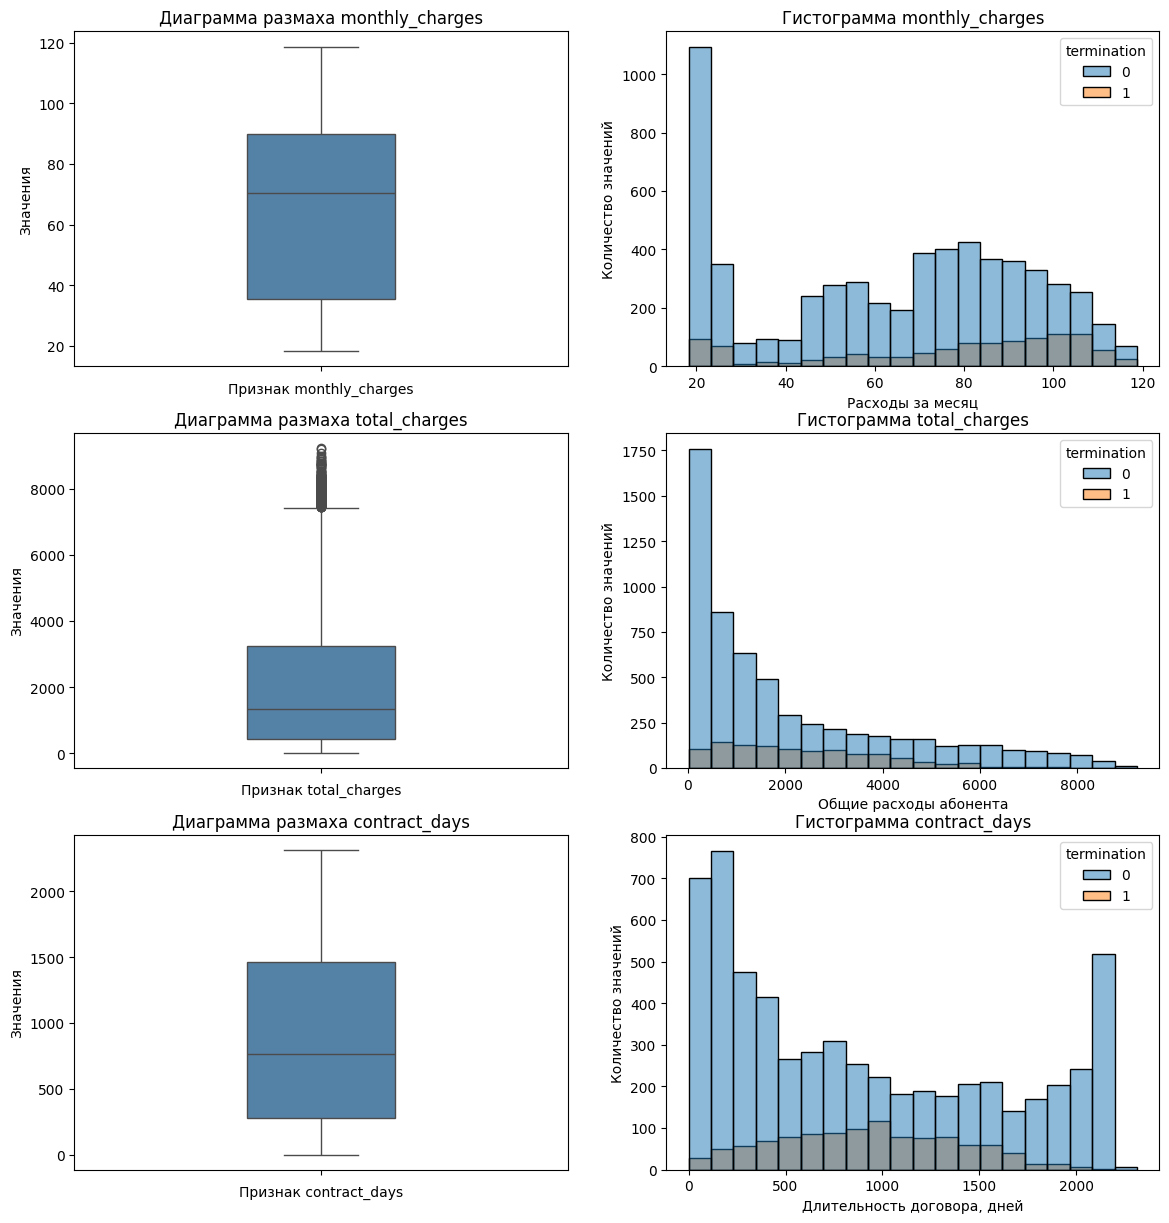

In [ ]:
# графики для количественных признаков (гистограммы и boxplot'ы)
x_labels = [
    'Расходы за месяц',
    'Общие расходы абонента',
    'Длительность договора, дней'
]
make_num_plots(contract_new, num_cols, x_labels, 'termination', 'steelblue')

Распределение признака monthly_charges не похоже на нормальное. <br>
Распределение признака total_chargres очень похоже на экспоненциальное распределение (или на распределение Парето).<br>
В распределениях monthly_charges и total_chargres видны пики вближе к нулевому значению по оси х: у большинства пользователей расходы невелики.<br>
Больше всего договоров, длительностью до 500 дней. Также наблююдается пик количества значений при длительности договора >2100.<br>
Из-за дисбаланса значений целевого признака (см. его распределение ниже) на графике не видно цвета значения '1' из легенды (пересекающиеся значения показаны серым).<br><br>

Согласно диаграмме размаха в признаке total_charges есть выбросы.

*Метод обнаружения выбросов IQR — это метод, который показывает, что любая точка данных в диаграмме, которая находится более чем на 1,5 IQR ниже данных первого квартиля или более чем на 1,5 IQR выше данных третьего квартиля, считается выбросом. IQR использует масштаб 1,5 для обнаружения выбросов, поскольку он наиболее точно соответствует распределению Гаусса.* <br>В нашем случае признаки, однако, имеющие выбросы, имеют распределение, не близкое к нормальному.
Посмотрим, сколько есть выбросов:

In [ ]:
# выбросы
q25 = np.quantile(contract_new['total_charges'], 0.25)
q75 = np.quantile(contract_new['total_charges'], 0.75)
outliers_1 = q25 - 1.5*(q75-q25)
outliers_2 = q75 + 1.5*(q75-q25)

print(outliers_1)
print(outliers_2)

-3763.16
7436.599999999999


In [ ]:
# количество выбросов
outliers_contract_new = contract_new.query(
    'total_charges < -3763.2 or total_charges > 7436.6'
)
display(outliers_contract_new.shape)
print(
    'Количество выбросов в contract_new:',
    '{:.1%}'.format(outliers_contract_new.shape[0] / contract_new.shape[0])
)

(195, 8)

Количество выбросов в contract_new: 2.8%


Выбросов в признаке:  195


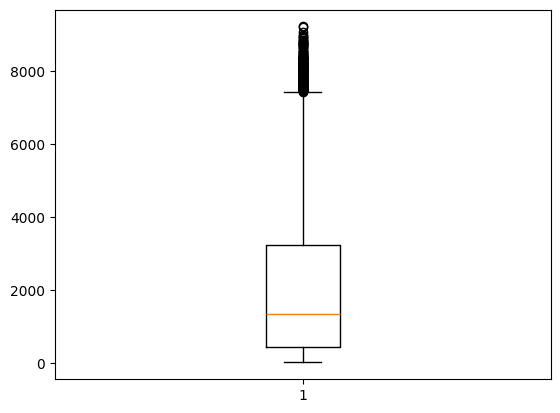

In [ ]:
# проверим количество выбросов более коротким способом
boxplot = plt.boxplot(contract_new['total_charges'].values)
outliers = list(boxplot["fliers"][0].get_data()[1])
print("Выбросов в признаке: ", len(outliers))

2.8% от общего размера датафрефма. Это немного, но пока удалять не будем.

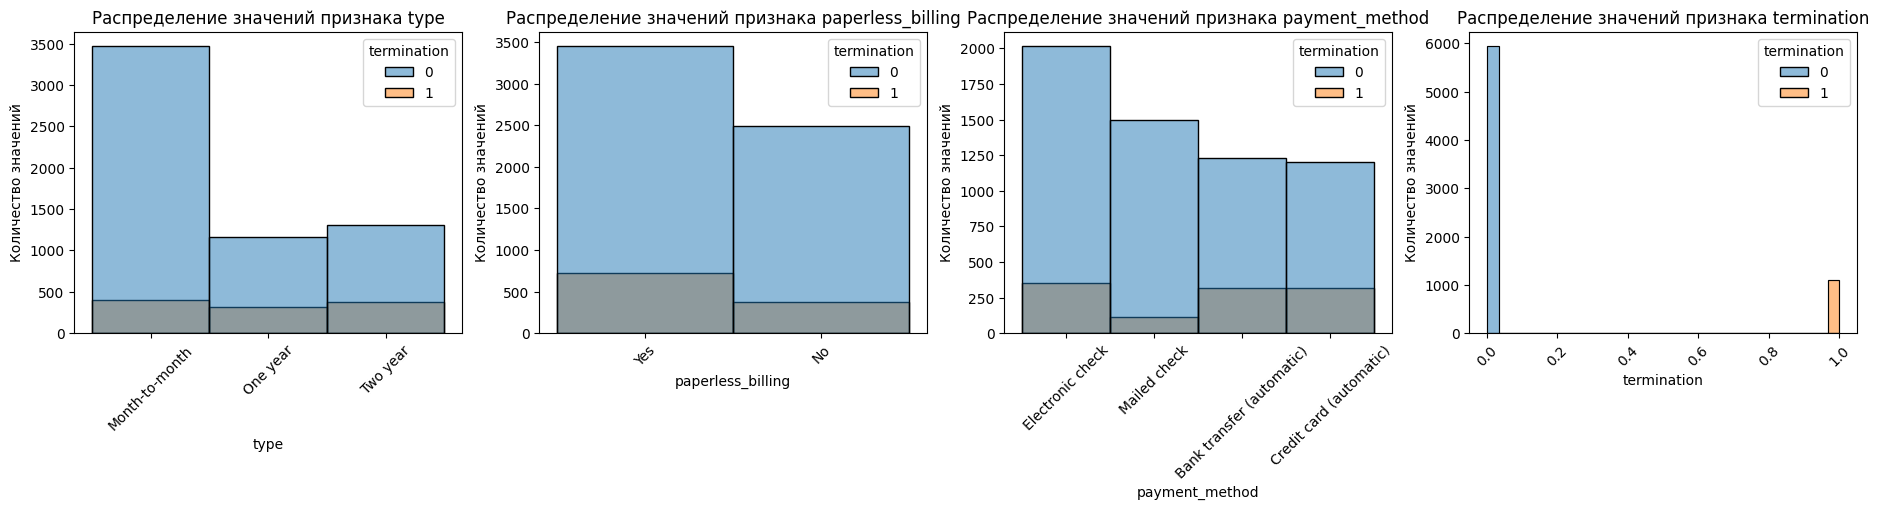

In [ ]:
# распределение качественных признаков датафрейма contract_new
fig = plt.figure(figsize=(23,18))
x_labels=['type', 'paperless_billing', 'payment_method', 'termination']
make_cat_plots(
    contract_new,
    cat_cols_contract_new,
    x_labels,
    'termination',
    'khaki'
)

Графики распределения признаков contract_new, указанные выше, показывают, что:
- ежемесячный тип оплаты - наиболее популярен (с большим отрывом от остальных типов оплаты).<br>
- чаще используется электронный расчетный лист и тип платежа 'электронный чек'.

Как было указано ранее, в целевом признаке присутствует дисбаланс.

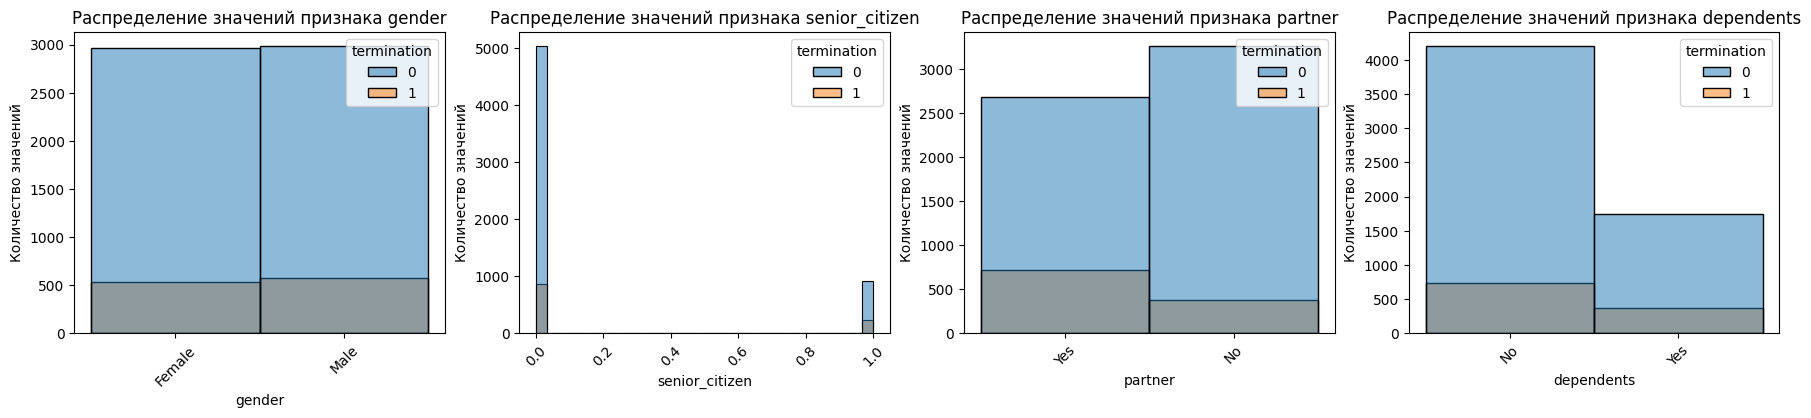

In [ ]:
# распределение качественных признаков датафрейма personal_new
fig = plt.figure(figsize=(22,18))
x_labels=['gender', 'senior_citizen', 'partner', 'dependents']
make_cat_plots(
    personal_new.merge(
        contract_new[['customer_id', 'termination']],
            how='left',
            on='customer_id'
    ),
    cat_cols_personal_new,
    x_labels,
    'termination',
    'darkkhaki'
)

Графики распределения качественных признаков personal_new показывают:
- количество клиентов мужского и женского пола примерно одинаково;
- подавляющее число абонентов - не пенсионеры;
- есть ли у абонента супруг или супруга - поровну;
- у большинства клиентов нет детей.

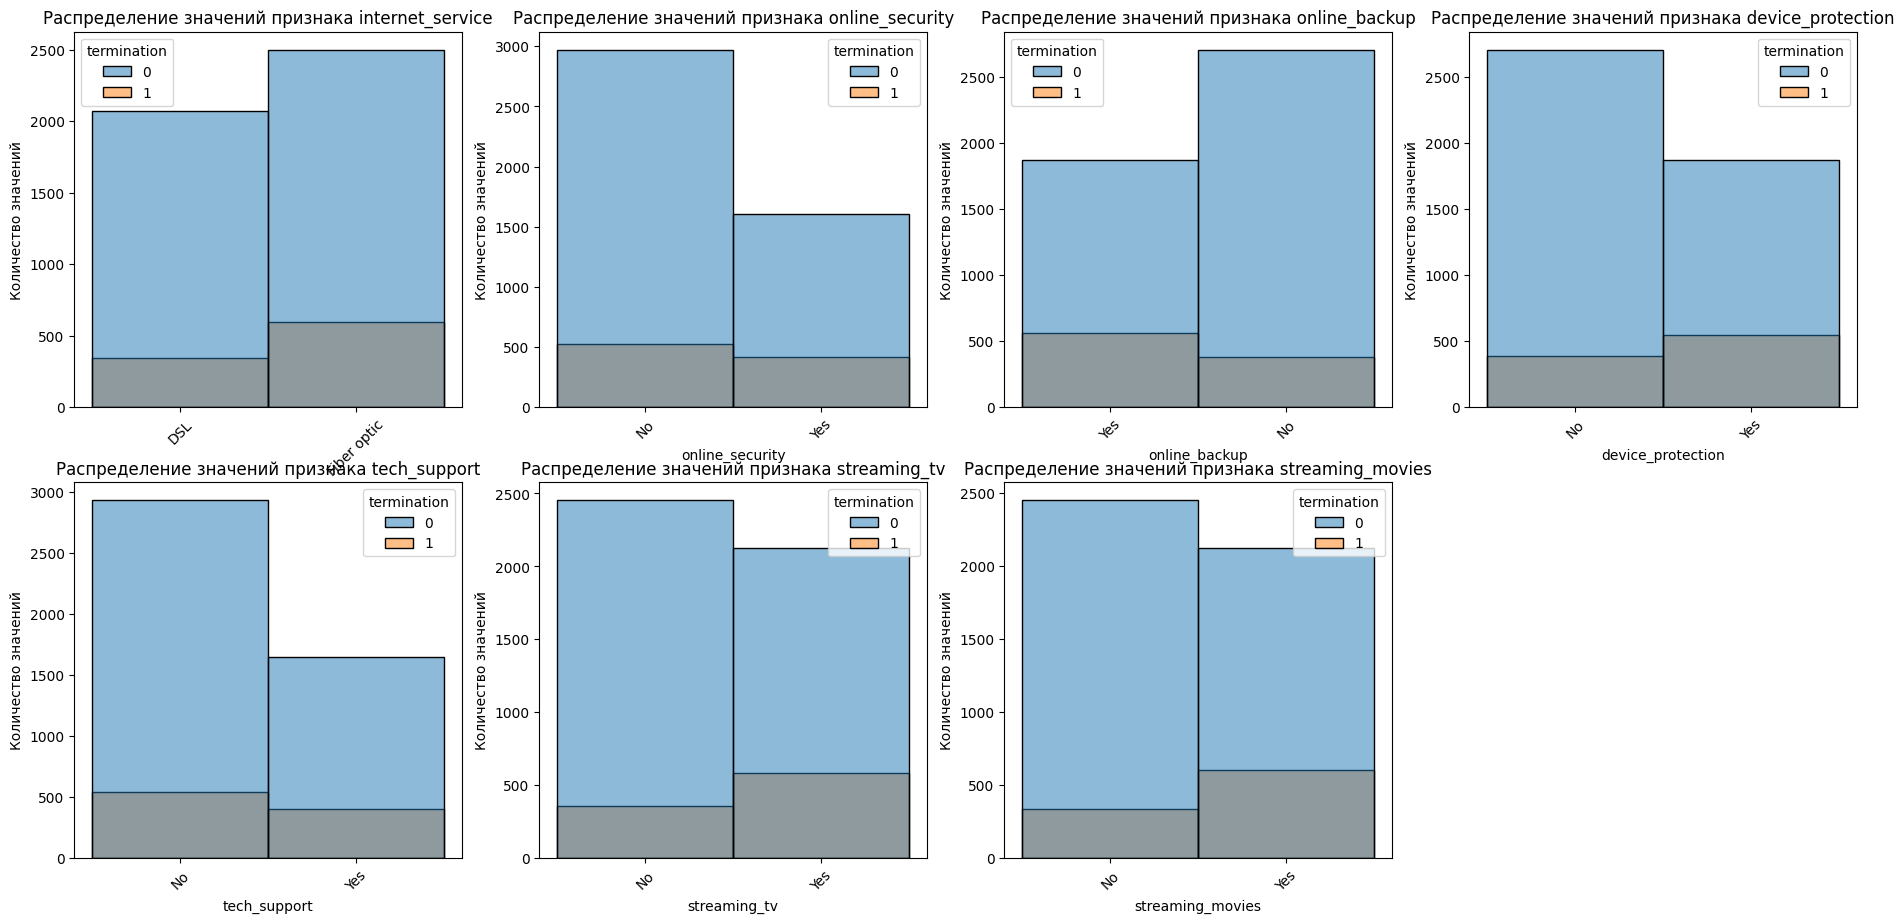

In [ ]:
# распределение качественных признаков датафрейма internet_new
fig = plt.figure(figsize=(23,40))
x_labels=[
    'internet_service',
    'online_security',
    'online_backup',
    'device_protection',
    'tech_support',
    'streaming_tv',
    'streaming_movies'
]
make_cat_plots(
    internet_new.merge(
        contract_new[['customer_id', 'termination']],
            how='left',
            on='customer_id'
    ),
    cat_cols_internet_new,
    x_labels,
    'termination',
    'y'
)

Графики распределения качественных признаков internet_new показывают, что:
- большее число абонентов используют цифровую абоненентскую линию (DSL) нежели оптоволокно (fiber optic);
- большинство не использует блокировку опасных сайтов, антивирус, выделенную линию тех. поддержки;
- большинство клиентов используют облачное хранилище для резервного копирования данных;
- примерно одинаковое количество клиентов, использующих стриминговое телевидение и каталог фильмов.

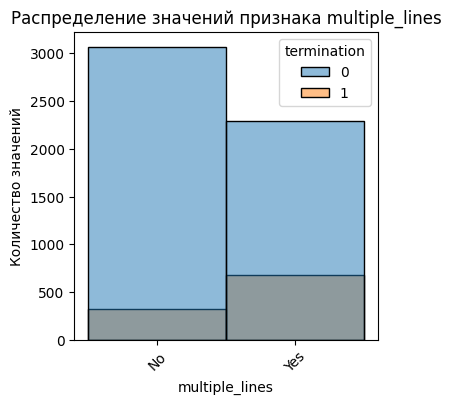

In [ ]:
# распределение качественных признаков датафрейма internet_new
fig = plt.figure(figsize=(18,4))
x_labels=['multiple_lines']
make_cat_plots(
    phone_new.merge(
        contract_new[['customer_id', 'termination']],
            how='left',
            on='customer_id'
    ),
    cat_cols_phone_new,
    x_labels,
    'termination',
    'olive'
)

На графике распределения признака multiple_lines датафрейма phone_new видно, что количесвтво абонентов, которые не используют подключение телефона к нескольким линиям одновременно, несколько больше тех, кто использует.

### Выводы

В этом разделе был проведен исследовательский анализ исходных данных:<br>
- с помощью графиков исследованы распределения количественных и качественных признаков (под графиками сделаны промежуточные выводы);
- удалены некоторые признаки, добавлен новый:<br>
Признак customer_id для обучения не понадобится, однако, пока оставим его для последующего объединения датафреймов.<br>
Также не пригодятся признаки с датами begin_date и end_date - они были удалены. С их помощью создан новый признак contract_days, который учитывает продолжительность действия договора клиента;
- значения целевого признака оказались несбалансированы.

## Объединение данных

In [ ]:
# объединим данные из всех датафреймов в один, установим индекс
united_df = (
    contract_new
    .merge(personal_new, how='left', on='customer_id')
    .merge(internet_new, how='left', on='customer_id')
    .merge(phone_new, how='left', on='customer_id')
    .set_index('customer_id')
)
united_df.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,termination,contract_days,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
customer_id,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [ ]:
# общий взгляд на объединенный dataframe
united_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless_billing  7043 non-null   object 
 2   payment_method     7043 non-null   object 
 3   monthly_charges    7043 non-null   float64
 4   total_charges      7043 non-null   float64
 5   termination        7043 non-null   int64  
 6   contract_days      7043 non-null   int64  
 7   gender             7043 non-null   object 
 8   senior_citizen     7043 non-null   int64  
 9   partner            7043 non-null   object 
 10  dependents         7043 non-null   object 
 11  internet_service   5517 non-null   object 
 12  online_security    5517 non-null   object 
 13  online_backup      5517 non-null   object 
 14  device_protection  5517 non-null   object 
 15  tech_support       5517 non-null   object 
 16  streaming_tv  

### Выводы

Данные из четырех Dataframe объединены в один для дальнешего исследования.<br>
Однако, снова требуется предобработка данных.

## Предобработка данных объединенного датафрейма

#### Пропущенные значения

In [ ]:
# проверим пропуски в данных объединенного  датафрейма
united_df.isna().sum()

,0
type,0
paperless_billing,0
payment_method,0
monthly_charges,0
total_charges,0
termination,0
contract_days,0
gender,0
senior_citizen,0
partner,0


Образовались пропуски, что логично, т.к. датафреймы internet_new и phone_new имеют меньшее количество объектов. Пропуски удалять не будем, заполним их значением 'Not defined' (не определено):

In [ ]:
united_df.fillna('Not defined', inplace=True)
united_df.isna().sum()

,0
type,0
paperless_billing,0
payment_method,0
monthly_charges,0
total_charges,0
termination,0
contract_days,0
gender,0
senior_citizen,0
partner,0


#### Поиск и удаление дубликатов

In [ ]:
print(f'Количество дубликатов:', united_df.duplicated().sum())
united_df[united_df.duplicated(keep=False) == True]

Количество дубликатов: 4


,type,paperless_billing,payment_method,monthly_charges,total_charges,termination,contract_days,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
customer_id,,,,,,,,,,,,,,,,,,,
4376-KFVRS,Two year,Yes,Credit card (automatic),114.05,8211.60,0,2191,Male,0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2866-IKBTM,Month-to-month,No,Mailed check,19.55,19.55,0,31,Female,0,No,No,Not defined,Not defined,Not defined,Not defined,Not defined,Not defined,Not defined,No
4312-KFRXN,Two year,No,Mailed check,25.40,1828.80,0,2191,Male,0,Yes,No,Not defined,Not defined,Not defined,Not defined,Not defined,Not defined,Not defined,Yes
8605-ITULD,Month-to-month,No,Mailed check,19.55,19.55,0,31,Female,0,No,No,Not defined,Not defined,Not defined,Not defined,Not defined,Not defined,Not defined,No
0673-IGUQO,Month-to-month,No,Mailed check,20.45,20.45,0,31,Male,0,No,No,Not defined,Not defined,Not defined,Not defined,Not defined,Not defined,Not defined,No
2668-TZSPS,Month-to-month,No,Mailed check,20.45,20.45,0,31,Male,0,No,No,Not defined,Not defined,Not defined,Not defined,Not defined,Not defined,Not defined,No
3892-NXAZG,Two year,Yes,Credit card (automatic),114.05,8211.60,0,2191,Male,0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes
8774-GSBUN,Two year,No,Mailed check,25.40,1828.80,0,2191,Male,0,Yes,No,Not defined,Not defined,Not defined,Not defined,Not defined,Not defined,Not defined,Yes


Все значения customer_id уникальны. Полных дубликатов нет.

### Выводы

Проведена предобработка данных объединенного dataframe:
- появившиеся пропуски устранены путем замены на значение 'No' (услуги не подключены);
- выявлены дубликаты, однако, все значения customer_id - уникальны, поэтому полные дубликаты отсутствуют.

## Исследовательский и корреляционный анализ объединенного датафрейма

#### Исследовательский анализ данных

In [ ]:
# разделение признаков объединенного dataframe на качественные и количественные

num_cols = [
    'monthly_charges',
    'total_charges',
    'contract_days'
]

cat_cols = [
    'type',
    'paperless_billing',
    'payment_method',
    'termination',
    'gender',
    'senior_citizen',
    'partner',
    'dependents',
    'internet_service',
    'online_security',
    'online_backup',
    'device_protection',
    'tech_support',
    'streaming_tv',
    'streaming_movies',
    'multiple_lines'
]

В дополнение к исследовательскому анализу, выполненному ранее, добавим диаграмму рассеяния количественных признаков (диаграмма с качественными признаками неинформативна) объединенного dataframe с учетом целевого признака.

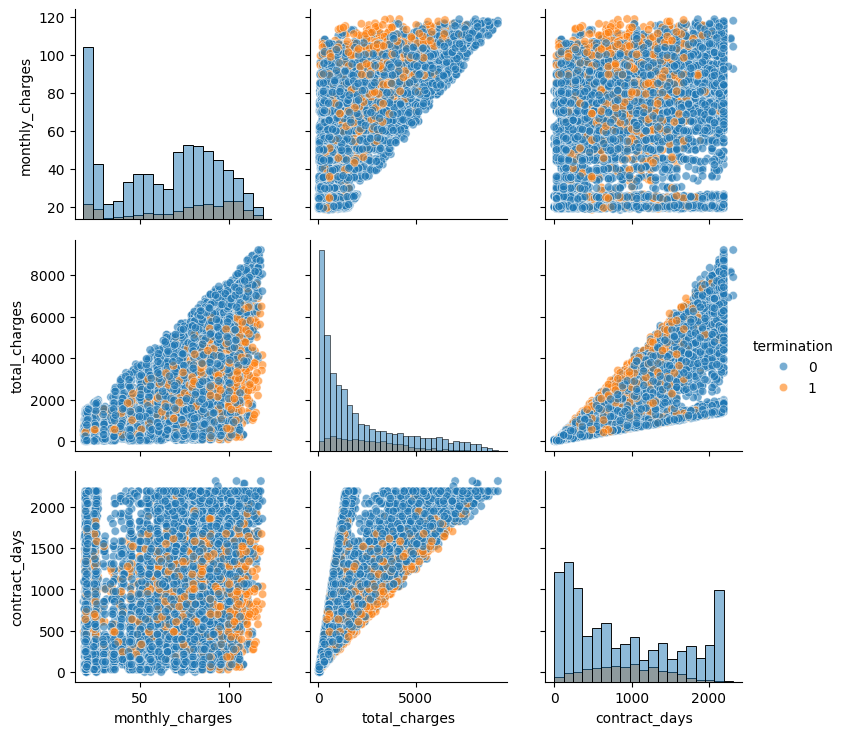

In [ ]:
g = sns.PairGrid(united_df, vars=num_cols, hue='termination')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot, alpha=0.6)
g.add_legend()

pass

Четкого разделения на классы целевой переменной не прослеживается, однако, можно кое-что заметить:
- необычные диаграммы в виде треугольника. Может ли это указывать, что данные синтетические?
- в проекции связи monthly_charges - total_charges и monthly_charges - contract_days класс '1' (клиент уйдет) сильнее сосредоточен в верхней части графика, где расходы за месяц - максимальные;
- в проектции total_charges - contract_days класс '1' 'плотнее' вдоль линии диагонали;
- в целом, чем больше месячные расходы, тем больше общие расходы, а также чем продолжительнее договор, темм больше платежей;
- зависимость между расходами за месяц и продолжительностью договора не прослеживается.

#### Корреляционный анализ данных

Судя по ранее рассмотренным распределениям количественных признаков,  не все они имеют нормальное распределение. В таком случае используем коэффициенты корреляции Спирмена. Однако, у нас есть категориальные признаки, поэтому построим матрицу корреляций, которая учитывает категориальные признаки (коэффициент корреляции Фи):

Text(0.5, 1.0, 'Матрица корреляций phone_new')

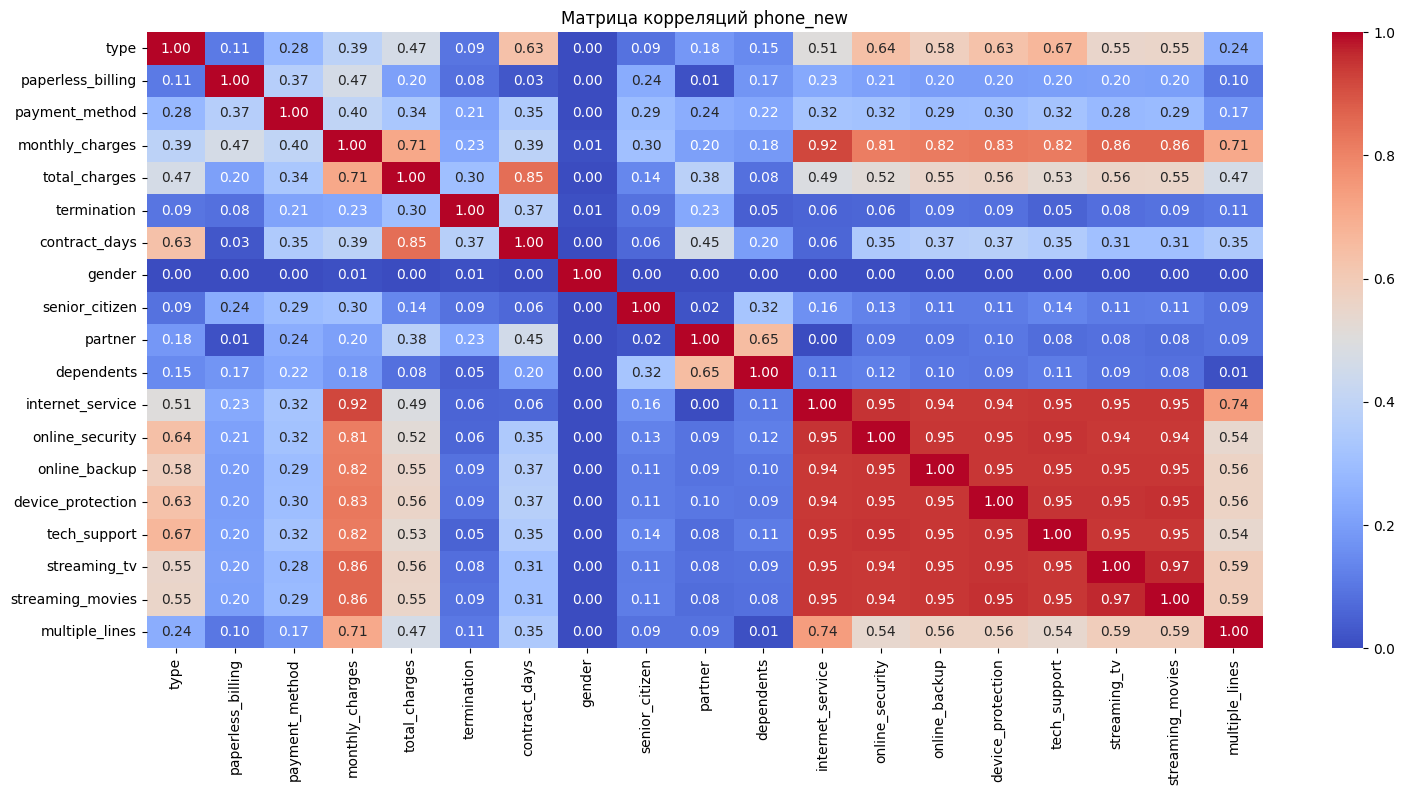

In [ ]:
fig = plt.figure(figsize=(18,8))

sns.heatmap(
    united_df.phik_matrix(interval_cols=num_cols),
    cmap='coolwarm',
    annot=True,
    fmt='.2f'
)
plt.title(f'Матрица корреляций {name}')

Отдельно выведем матрицу корреляций количественных признаков (используем коэффициент Спирмена):

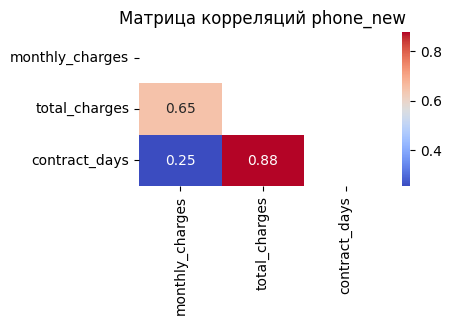

In [ ]:
matrix = np.triu(united_df[num_cols].corr()) # маска для верхнего △ матрицы

fig = plt.figure(figsize=(4,2))

sns.heatmap(
    united_df[num_cols].corr(method='spearman'),
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    mask=matrix
)
plt.title(f'Матрица корреляций {name}')

pass

Взаимосвязь целевого признака с входными выражена не сильно (использована шкала Чеддока):
- максимальное значение коэффициента корреляции - с признаками contract_days и total_charges (умеренная взаимосвязь);
- слабая связь с большинством остальных признаков;
- также присутствуют значения коэффициента < 0.1.<br><br>

Как правило, о мультиколлинеарности говорят при значении коэффициента корреляции от 0.9 до 0.95 по модулю.   <br>
В нашем случае наблюдается мультиколлинеарность между признаками. Видим высокую взаимосвязь между входными признаками internet_servise и monthly_charges (0.92). Но это взаимосвязь между количественной и качественной (бинарной) переменной, поэтому принимать во внимание столь высокую связь не будем.<br>
Также есть мультиколлинеарность между качественными признаками, но это не повлияет на работу моделей. <br><br>
Сделаем дополнительную проверку с помощью VIF (Variance Inflation Factor).


In [ ]:
# Используем termination в качестве целевой переменной
y, X = dmatrices('termination ~ type+paperless_billing+payment_method+ \
    monthly_charges+total_charges+contract_days+gender+senior_citizen+ \
    partner+dependents+internet_service+online_security+online_backup+ \
    device_protection+tech_support+streaming_tv+streaming_movies+ \
    multiple_lines', \
    data=united_df,
    return_type='dataframe'
)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1]
    )]
vif['variable'] = X.columns

vif

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF,variable
0,1956.279314,Intercept
1,1.546897,type[T.One year]
2,2.436694,type[T.Two year]
3,1.208319,paperless_billing[T.Yes]
4,1.561774,payment_method[T.Credit card (automatic)]
5,1.965635,payment_method[T.Electronic check]
6,1.839428,payment_method[T.Mailed check]
7,1.001420,gender[T.Male]
8,1.436809,partner[T.Yes]
9,1.382491,dependents[T.Yes]


Значения >10 (в некоторых источниках >5, т.о. выбор порога неоднозначен) указывают на мультиколлинеарность между независимыми переменными. В данном случае такие значения имеются (internet_service, monthly_charges), на, как было определено ранее, их взаимосвязь в расчет не берем.
<br>Значение Intersept игнорируем, он не имеет значения для модели.<br><br>

Повторно выполним анализ с помощью VIF, исключив признак monthly_charges:





In [ ]:
# повторной вывоз VIF без признака monthly_charges
y, X = dmatrices('termination ~ type+paperless_billing+payment_method+ \
    total_charges+contract_days+gender+senior_citizen+ \
    partner+dependents+internet_service+online_security+online_backup+ \
    device_protection+tech_support+streaming_tv+streaming_movies+ \
    multiple_lines', \
    data=united_df,
    return_type='dataframe'
)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1]
    )]
vif['variable'] = X.columns

vif

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF,variable
0,17.958830,Intercept
1,1.546887,type[T.One year]
2,2.436627,type[T.Two year]
3,1.208215,paperless_billing[T.Yes]
4,1.561774,payment_method[T.Credit card (automatic)]
5,1.965591,payment_method[T.Electronic check]
6,1.839327,payment_method[T.Mailed check]
7,1.001290,gender[T.Male]
8,1.436401,partner[T.Yes]
9,1.382440,dependents[T.Yes]


В таком случае значения находятся в пределах 1-10, что означает умеренную зависимость между признаками, что допустимо.

### Портрет ушедшего клиента

Распределение признака количественных признаков для ушедших и оставшихся клиентов с помощью графика KDE, где по оси y будет показана доля относительно датасета вместо абсолютного количества (ранее в исследовательском анализе были использованы гистограммы):

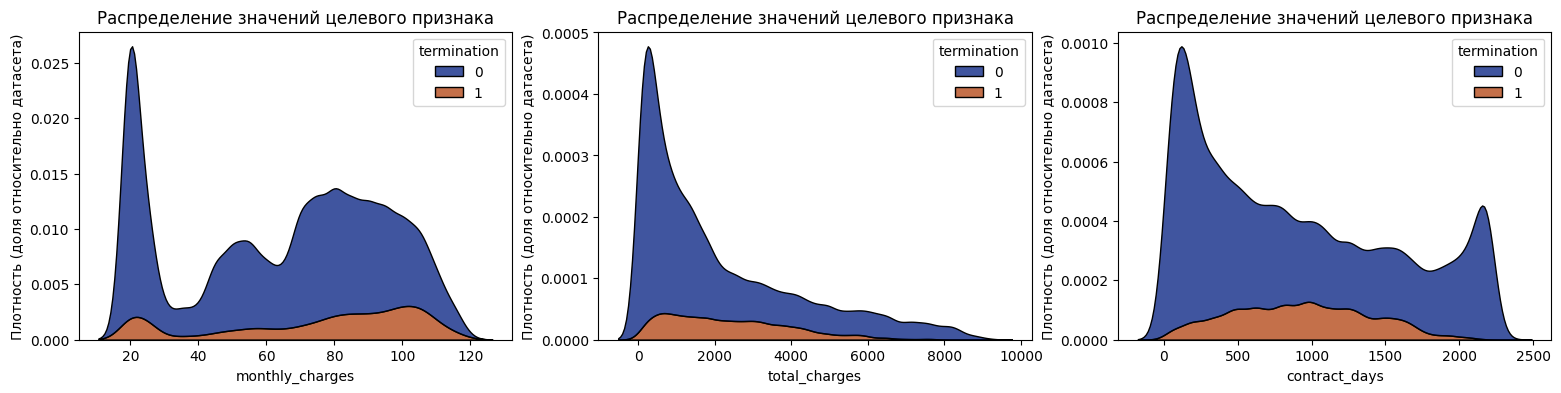

In [ ]:
fig = plt.figure(figsize=(19,4))
subplt = 1
sns.set_palette('dark')
for c in united_df[['monthly_charges', 'total_charges', 'contract_days']]:
    ax = fig.add_subplot(1, 3, subplt)
    sns.kdeplot(
        united_df,
        x=c,
        hue='termination',
        bw_adjust=.5,  # немного снизим гладкость графиков
        multiple='stack',
        alpha=.75
    )
    subplt += 1

    plt.title(f'Распределение значений целевого признака')
    plt.ylabel('Плотность (доля относительно датасета)')
    plt.xlabel(c)

pass

Распределения несимметричны.
monthly_charges и total_charges имеют один пик, contract_days - два.<br>
В целом распределения значений для разных классов целевого признака похожи за исключением того, что в признаке contract_days у класса '1' нет пиков, а, наоборот, распределение стремится к нормальному (клиенты с минимальной и максимальной длиной контракта охотнее остаются с "ТелеДом").

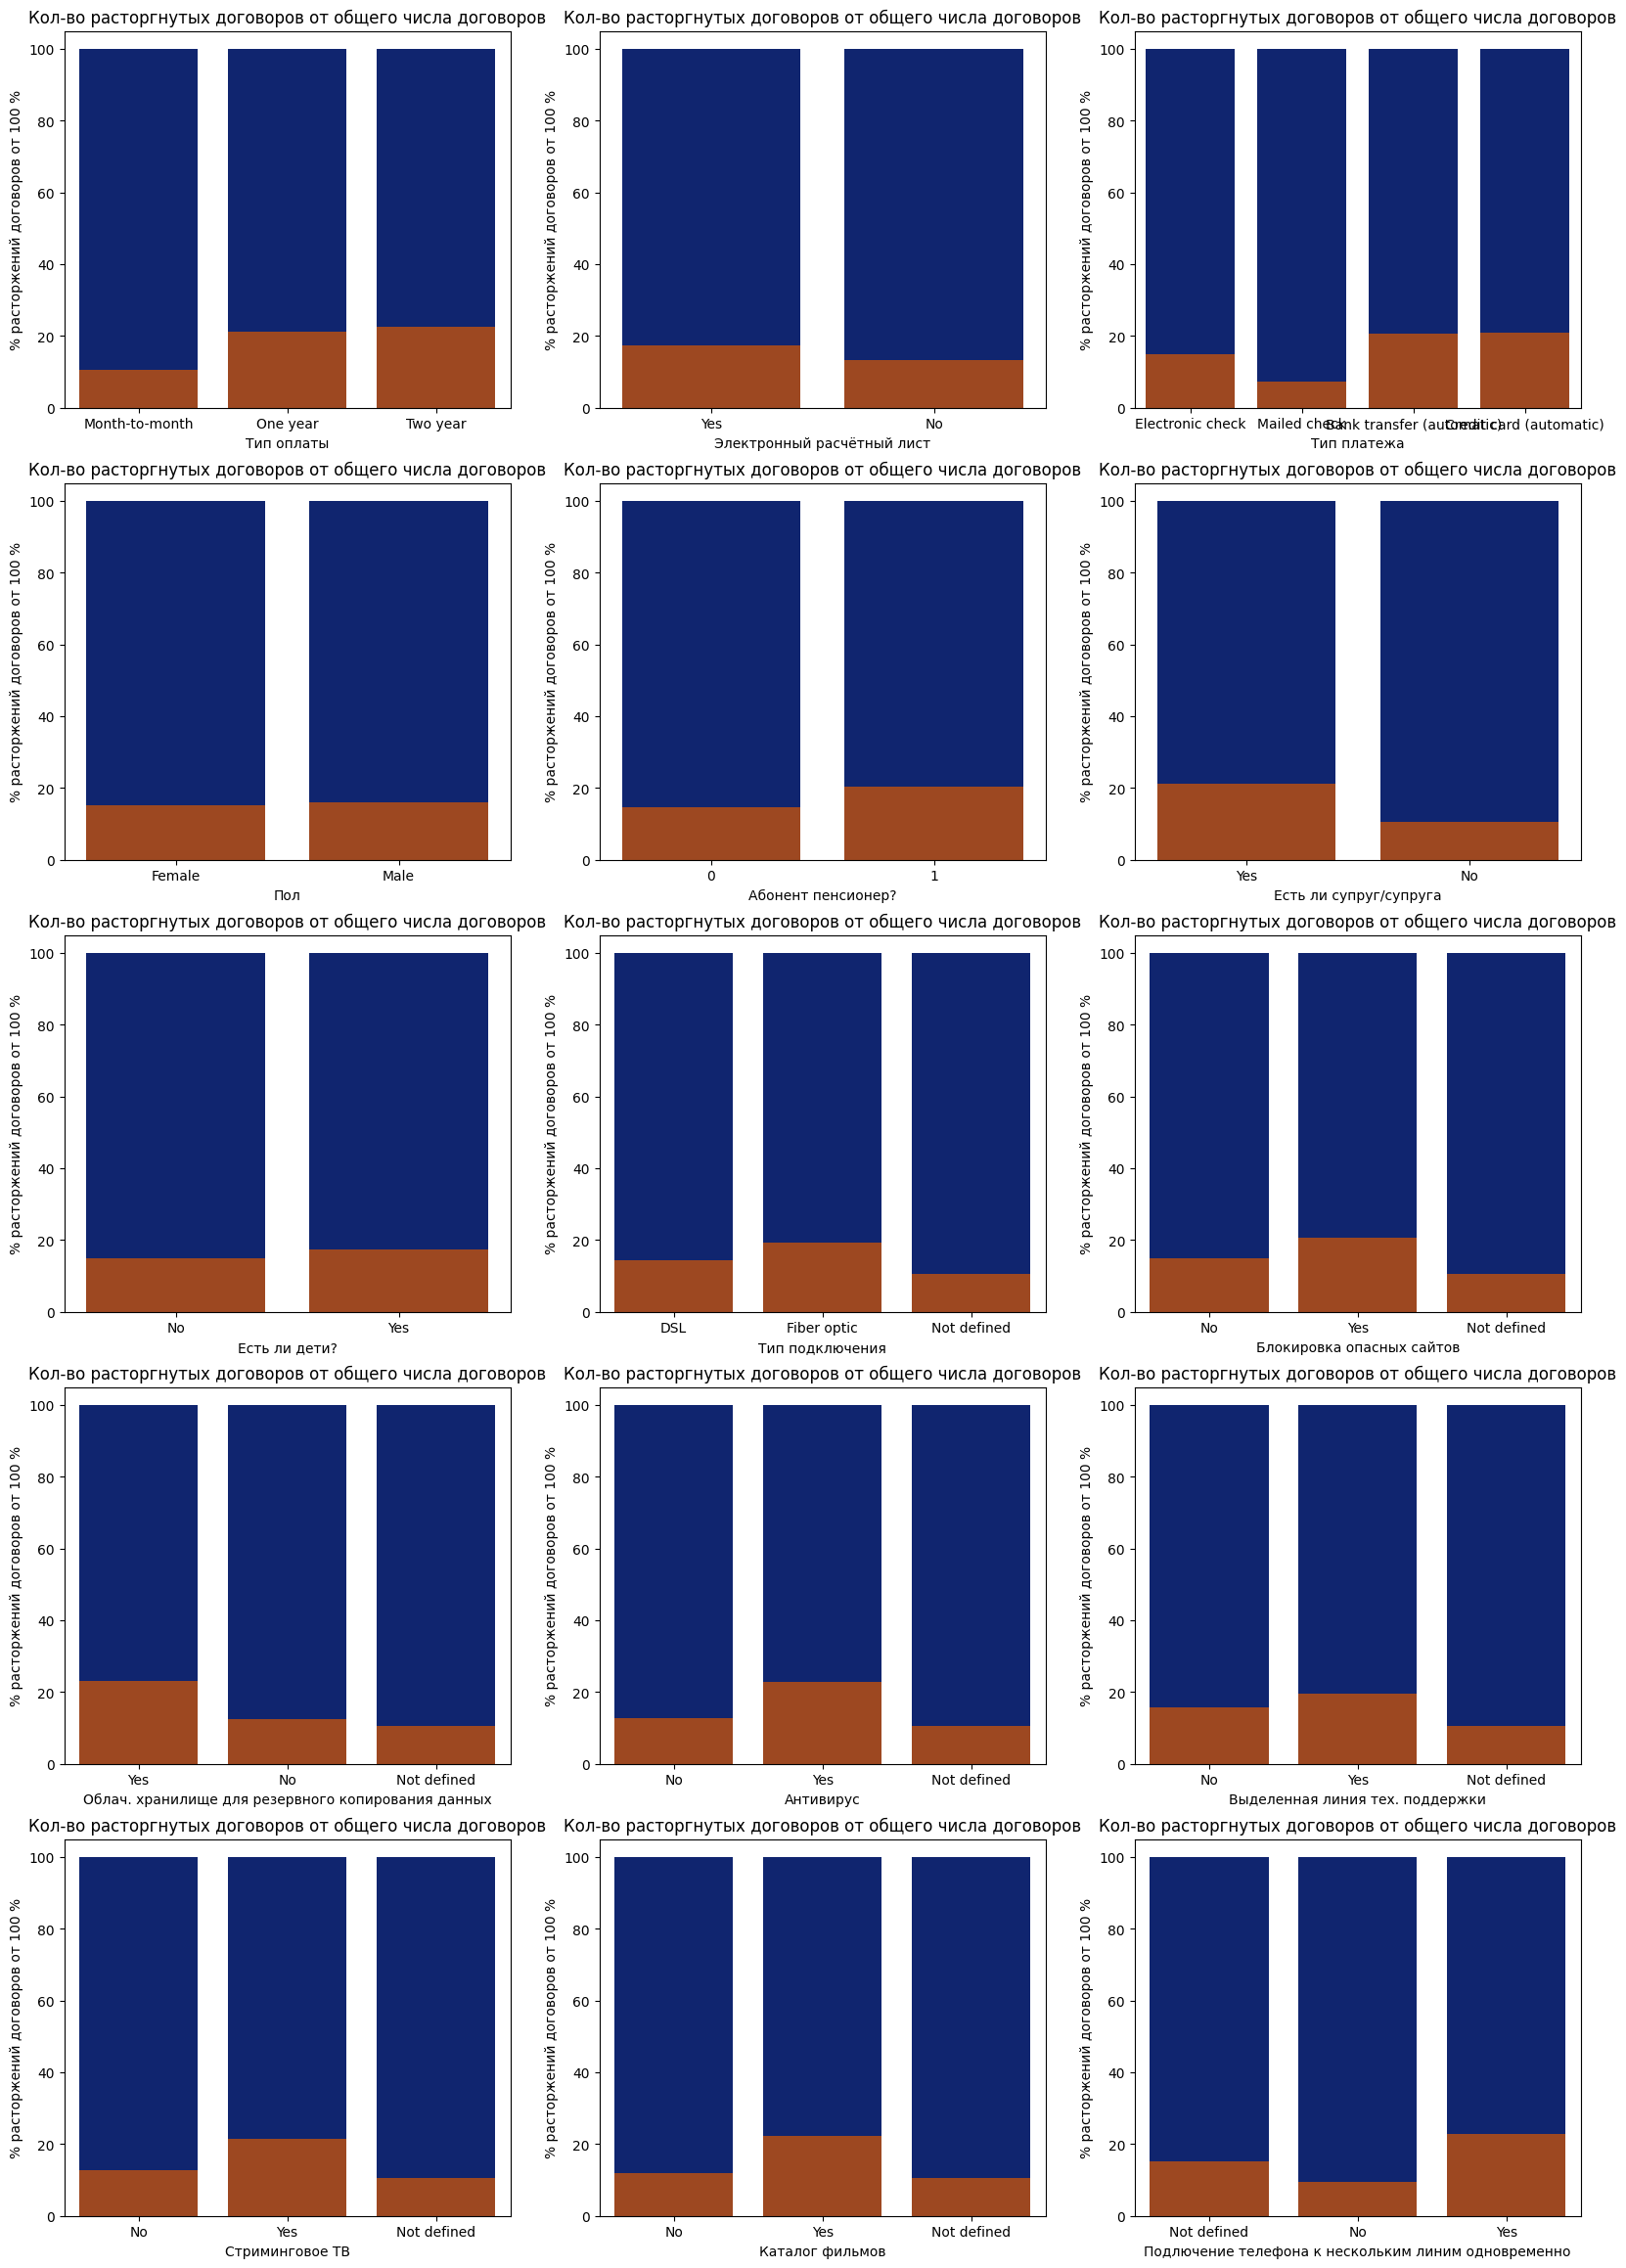

In [ ]:
fig = plt.figure(figsize=(20, 95))

x_labels = ['Тип оплаты',
            'Электронный расчётный лист',
            'Тип платежа',
            ' ',
            'Пол',
            'Абонент пенсионер?',
            'Есть ли супруг/супруга',
            'Есть ли дети?',
            'Тип подключения',
            'Блокировка опасных сайтов',
            'Облач. хранилище для резервного копирования данных',
            'Антивирус',
            'Выделенная линия тех. поддержки',
            'Стриминговое ТВ',
            'Каталог фильмов',
            'Подлючение телефона к нескольким линим одновременно'
]
total_axes = len(cat_cols)
subplt = 1
for n, c in enumerate(united_df[cat_cols]):
    if c != 'termination':
      ax = fig.add_subplot(total_axes, 3, subplt, xlabel=x_labels[n])
      sns.barplot(x=united_df[c], y=100)
      sns.barplot(
        united_df.query('termination == 1').groupby(by=[c])[c].count()
        / united_df.groupby(by=[c])[c].count() * 100
     )
      subplt += 1

      plt.title(f'Кол-во расторгнутых договоров от общего числа договоров')
      plt.ylabel('% расторжений договоров от 100 %')

pass

Наблюдения (по наиболее явным различим в классах) по графикам 'Количество расторгнутых договоров от общего числа договоров':
- тип оплаты (type): чаще 'отваливаются' клиенты с оплатой раз в года-два;
- тип платежа (payment_method): реже расторгают договоры те клиенты, у которых способ оплаты - чек по почте (mailed check);
- чаще расторгают договор пенсионеры, а также абоненты, у которых есть супруг/супруга (который(ая) подсказывает юолее выгодные предложения?);
- тип подключения: абоненты с оптоволокном (fiber optic) чаще расторгают договор;
- чаще уходят клиенты с подключенными доп. услугами (т.е. они остаются недовольными качеством этих услуг?).

### Выводы

In [ ]:
united_df['payment_method'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

В текущем разделе был проведен исследовательский и корреляционный анализ объединенного датафрейма. <br><br>

Четкого разделения на классы целевой переменной не прослеживается. <br>
Взаимосвязь целевого признака с входными выражена не сильно (использована шкала Чеддока): максимальное значение коэффициента корреляции - с признаками contract_days и total_charges (умеренная взаимосвязь).<br>

Проведена проверка и дополнительная проверка с помощью VIF на наличие мультколлинеарности между признаками.<br>

Распределения количественных признаков (в разрезе целевого признака) несимметричны (использованы графики KDE).
В целом распределения значений для разных классов целевого признака похожи за исключением того, что в признаке contract_days у класса '1' нет пиков, а, наоборот, распределение стремится к нормальному (клиенты с минимальной и максимальной длиной контракта охотнее остаются с "ТелеДом").<br>

Какие клиенты чаще расторгают договор:
- тип оплаты (type): раз в года-два;
- тип платежа (payment_method): bank transfer (automatic) и credit card (automatic)';
- пенсионеры;
- абоненты, у которых есть супруг/супруга;
- тип подключения: абоненты с оптоволокном (fiber optic);
- с подключенными дополнительными услугами.




## Подготовка данных

### Проблема дисбаланса классов, разбивка Datarame на выборки


In [ ]:
# соотношение классов (в долях)
united_df['termination'].value_counts(normalize=True)

,proportion
termination,
0,0.843675
1,0.156325


**О метриках в данном проекте**<br><br>
Для задач с дисбалансом классов как метрика качества не подойдет accuracy (покажет неадекватно высокое качество модели). <br>
F1-мера — это среднее гармоническое precision и recall, поэтому она будет показывать низкое качество модели, если хотя бы одна из его составляющих даёт низкую оценку.<br>
Precision, recall, ROC-AUC работают адекватно при любом соотношении классов. <br>
Сначала оценим модель более обощенно с помощью метрики **ROC-AUC** согласно Технического задания.<br>

У мажорного класса '0' приемущество: модель будет лучше предсказывать это значение. <br>
Конечно, ROC-AUC хорошо работает с дисбаланом, но c целью минимизации последствий такого распределения целевого признака на этапе разработки данного проекта была произведена попытка устранения дисбаланса с помощью сэмплирования.
Было искусственно увеличено количество значений минорного класса методом oversampling/upsampling (только для тренировочной выборки). Был использован алгоритм RandomOverSampling: новые наблюдения не были созданы, но было увеличено количество существующих. Однако, upsampling в дальнешейм привел к переобучению модели (что было очень вероятно), и было принято решение от него отказаться.<br>

При разделении выборки на тренировочную и тестовую используем стратификацию по целевому признаку, т.к. имеем упомянутый ранее дисбаланс классов target'а.



In [ ]:
# делим DataFrame на тренировочную и тестовую выборки со стратификацией
X = united_df.drop(columns='termination')
y = united_df['termination']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

### Создание пайплайна

In [ ]:
# список признаков для разных кодировщиков
ohe_cols = [
    'type',
    'paperless_billing',
    'payment_method',
    'gender',
    'senior_citizen',
    'partner',
    'dependents',
    'internet_service',
    'online_security',
    'online_backup',
    'device_protection',
    'tech_support',
    'streaming_tv',
    'streaming_movies',
    'multiple_lines'
]
ord_cols = []

'''
такой код был бы лучше, но почему-то происходит перезапись cat_cols...
ohe_cols = cat_cols
ohe_cols = ohe_cols.remove('termination')
'''

"\nтакой код был бы лучше, но почему-то происходит перезапись cat_cols...\nohe_cols = cat_cols\nohe_cols = ohe_cols.remove('termination')\n"

In [ ]:
# подготовка признаков ohe_cols: заполнение пропусков и OHE-кодирование
ohe_pipe = Pipeline(
    [
         (
         'ohe',
         OneHotEncoder(
             drop='first',
             handle_unknown='error',
             sparse_output=False
             )
         )
    ]
)

# подготовка признаков ord_cols: заполнение пропусков и Ordinal-кодирование
# без использования SimpleImputer (т.к. заполняли пропуски константой)
ord_pipe = Pipeline(
    [
        (
         'ord',
         OrdinalEncoder(
             categories=[],
             handle_unknown='use_encoded_value',
             unknown_value=np.nan
             )
         )
    ]
)

In [ ]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_cols),
        ('ord', ord_pipe, ord_cols),
        ('num', StandardScaler(), num_cols)
    ],
    remainder='passthrough'
)

In [ ]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', LogisticRegression())
    ]
)

In [ ]:
# создадим списки для перебора гиперпараметров
'''
Примечание к Лог. регрессии:
solver='liblinear' применяют для бинарной классиф. и маленького
датасета (наш случай), однако, попробуем перебрать и
другие алгоритмы решения
'''

param_grid_lr = [
        # словарь для модели LogisticRegression()
    {
        'models': [
            LogisticRegression(
            random_state=RANDOM_STATE
            )
        ],
        'models__C': range(0, 6),
        'models__penalty': ['l1', 'l2'],
        'models__solver': [
            'liblinear', 'lbfgs', 'sag', 'saga', 'newton-cg', 'newton-cholesky'
        ],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

param_grid_dt = [
        # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        #'models__criterion': ['gini', 'entropy', 'log_loss'],
        'models__max_leaf_nodes': range(1,50),
        'preprocessor__num': ['passthrough']
    }
]

param_grid_knn = [
        # словарь для модели KNeighborsClassifier()
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(20, 45),
        'models__metric': ['euclidean', 'manhattan'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

param_grid_svc = [
            # словарь для модели SVC()
    {
        'models': [SVC(probability=True)],
        'models__kernel': ['poly', 'rbf'],
        'models__C': range(1, 4),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]
param_grid_cb = [
        # словарь для модели CatBoostClassifier()
    {
        'models':[
            CatBoostClassifier(random_state=RANDOM_STATE)
        ],
        'models__n_estimators': [5, 5000], #кол-во деревьев в град. бустинге
        'models__max_depth': range(1, 7), # max глубина дерева
        'preprocessor__num': ['passthrough']
    }
]

param_grid_lgb = [
        # словарь для модели LGBMClassifier()
    {
        'models': [lgb.LGBMClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': [5, 835], #кол-во деревьев в град. бустинге
        'models__max_depth': range(1, 18), # max глубина дерева
        'preprocessor__num': ['passthrough']
    }
]

### Еще один взгляд на взаимосвязь данных

После того, как построен финальный pipeline, подготовленные (отмасштабированные и закодированные) много мерные данные можно спроецировать на двумерную плоскость с помощью алгоритма уменьшения размерности UMAP. Это позволит визуально оценить разделение меток целевого признака.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_al

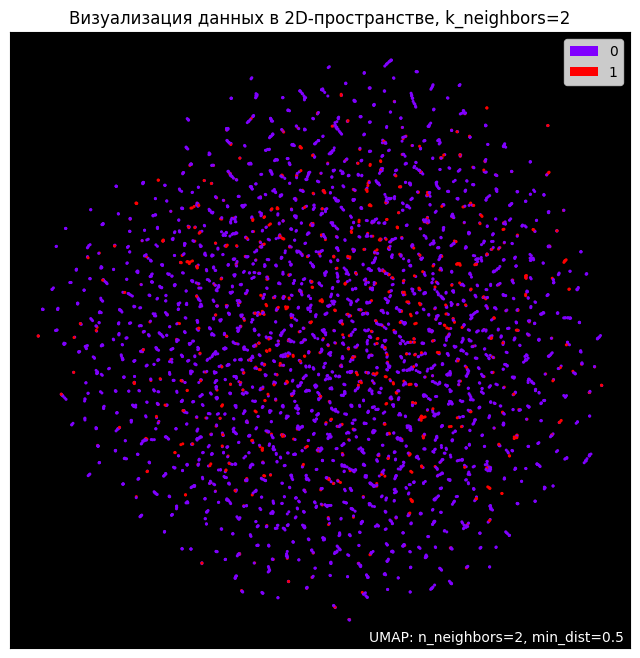

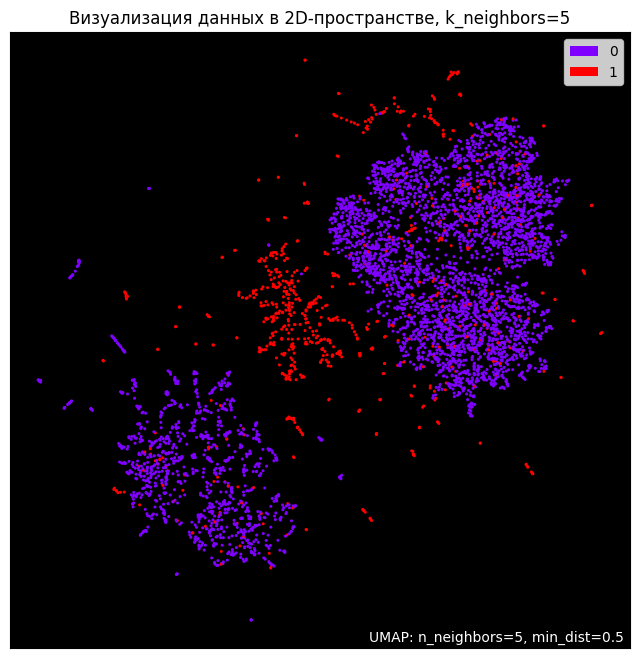

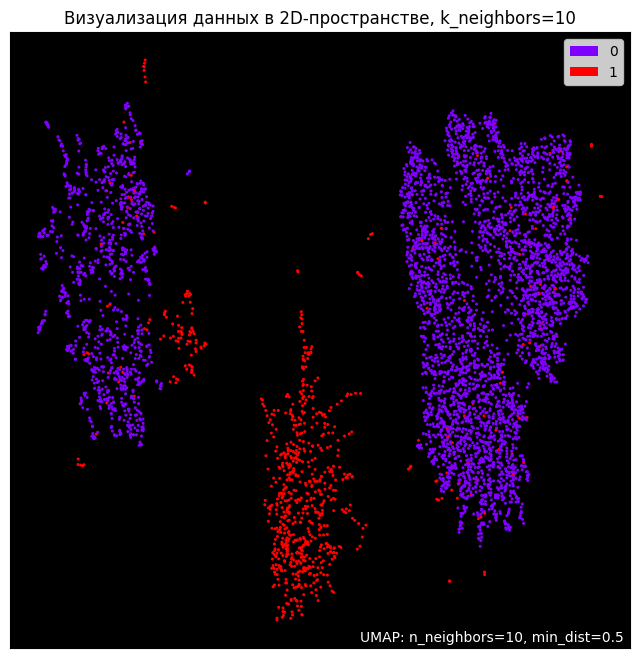

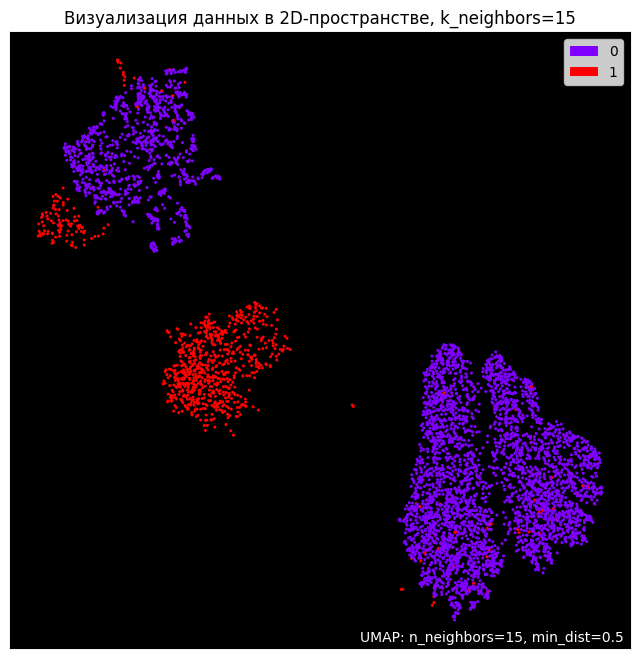

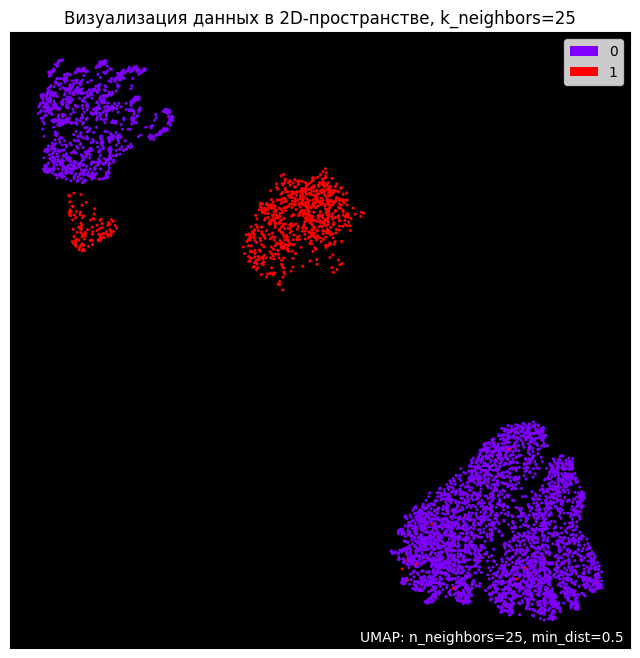

In [ ]:
X_train_umap = data_preprocessor.fit_transform(X_train)

for i in [2, 5, 10, 15, 25]:
    umap_fitted = umap.UMAP(
        n_neighbors=i, min_dist=0.5
    ).fit(X_train_umap, y_train)
    #X_reduced = manifold.transform(X_train_umap)

    #fig = plt.figure(figsize=(5,3))
    umap.plot.points(umap_fitted, labels=y_train, theme='fire')
    plt.title(f'Визуализация данных в 2D-пространстве, k_neighbors={i}')

pass

n_neighbors: чем меньше значение, тем больше алгоритм пытается уловить локальную структуру данных; чем больше значение, тем больше учитывается глобальная структура (в ущерб деталям).<br>
Использовано min_dist (минимальное расстояние) больше, чем значение по умолчанию, равное 0.1 (более высокие значения используют для того, чтобы взглянуть на структуру данных как единое целое).<br><br>
Картина сильно меняется в зависимости от параметра k_neighbors: чем он выше, тем метки лучше разделяются, но смазываются детали. Плюс в том, что классы хотя бы разделяются, а не остаются перемешанными друг с другом. Т.о., увеличиваются шансы успешной работы моделей.


### Выводы

Рассмотрена проблема дисбаланса классов целевого признака. <br>
Данные подготовлены для дальнейшего моделирования (использованы пайплайны).<br>
С помощью алгоритма уменьшения размерности UMAP произведена визуальная оценка разделения классов целевого признака.

## Обучение моделей машинного обучения

### Модель 1: логистическая регрессия

In [ ]:
%%time

randomized_search_lr = RandomizedSearchCV(
    pipe_final,
    param_grid_lr,
    cv=5,
    scoring='roc_auc',
    #refit='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=12
)
randomized_search_lr.fit(X_train, y_train)

print(
    'Лучшая модель и её параметры:\n',
    randomized_search_lr.best_params_
)
print (
    'Метрика лучшей модели при кросс-валидации:',
       randomized_search_lr.best_score_
)

Лучшая модель и её параметры:
 {'preprocessor__num': 'passthrough', 'models__solver': 'liblinear', 'models__penalty': 'l1', 'models__C': 2, 'models': LogisticRegression(random_state=270125)}
Метрика лучшей модели при кросс-валидации: 0.7660772404509031
CPU times: user 846 ms, sys: 135 ms, total: 981 ms
Wall time: 11 s


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **la

###  Модель 2: дерево решений

In [ ]:
%%time

randomized_search_dt = RandomizedSearchCV(
    pipe_final,
    param_grid_dt,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=12,
)
randomized_search_dt.fit(X_train, y_train)

print(
    'Лучшая модель и её параметры:\n',
    randomized_search_dt.best_params_
)
print (
    'Метрика лучшей модели при кросс-валидации:',
       randomized_search_dt.best_score_
)

Лучшая модель и её параметры:
 {'preprocessor__num': 'passthrough', 'models__max_leaf_nodes': 26, 'models': DecisionTreeClassifier(random_state=270125)}
Метрика лучшей модели при кросс-валидации: 0.7776424771864419
CPU times: user 473 ms, sys: 13.5 ms, total: 486 ms
Wall time: 3.41 s


### Модель 3:  k-ближайших соседей

In [ ]:
%%time

randomized_search_knn = RandomizedSearchCV(
    pipe_final,
    param_grid_knn,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=12,
)
randomized_search_knn.fit(X_train, y_train)

print(
    'Лучшая модель и её параметры:\n',
    randomized_search_knn.best_params_
)
print (
    'Метрика лучшей модели при кросс-валидации:',
       randomized_search_knn.best_score_
)

Лучшая модель и её параметры:
 {'preprocessor__num': StandardScaler(), 'models__n_neighbors': 44, 'models__metric': 'euclidean', 'models': KNeighborsClassifier()}
Метрика лучшей модели при кросс-валидации: 0.7956755894935872
CPU times: user 761 ms, sys: 23.5 ms, total: 784 ms
Wall time: 7.15 s


### Модель 4: опорные векторы

In [ ]:
%%time

randomized_search_svc = RandomizedSearchCV(
    pipe_final,
    param_grid_svc,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=12,
)
randomized_search_svc.fit(X_train, y_train)

print(
    'Лучшая модель и её параметры:\n',
    randomized_search_svc.best_params_
)
print (
    'Метрика лучшей модели при кросс-валидации:',
       randomized_search_svc.best_score_
)

Лучшая модель и её параметры:
 {'preprocessor__num': StandardScaler(), 'models__kernel': 'rbf', 'models__C': 2, 'models': SVC(probability=True)}
Метрика лучшей модели при кросс-валидации: 0.7690766244483273
CPU times: user 6.73 s, sys: 301 ms, total: 7.03 s
Wall time: 3min 20s


### Модель 5: CatBoost (классификатор)

In [ ]:
%%time

randomized_search_cb = RandomizedSearchCV(
    pipe_final,
    param_grid_cb,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=12,
    verbose=0
)
randomized_search_cb.fit(X_train, y_train)

print(
    'Лучшая модель и её параметры:\n\n',
    randomized_search_cb.best_params_
)
print (
    'Метрика лучшей модели при кросс-валидации:',
       randomized_search_cb.best_score_
)

Выходные данные были обрезаны до нескольких последних строк (5000).
6:	learn: 0.6670813	total: 73.2ms	remaining: 52.2s
7:	learn: 0.6630446	total: 77ms	remaining: 48s
8:	learn: 0.6599325	total: 80.7ms	remaining: 44.8s
9:	learn: 0.6560334	total: 84.4ms	remaining: 42.1s
10:	learn: 0.6526464	total: 88.2ms	remaining: 40s
11:	learn: 0.6487534	total: 92ms	remaining: 38.2s
12:	learn: 0.6452392	total: 95.7ms	remaining: 36.7s
13:	learn: 0.6418634	total: 99.4ms	remaining: 35.4s
14:	learn: 0.6390124	total: 102ms	remaining: 34s
15:	learn: 0.6360191	total: 106ms	remaining: 33s
16:	learn: 0.6327289	total: 110ms	remaining: 32.1s
17:	learn: 0.6301840	total: 112ms	remaining: 31s
18:	learn: 0.6272106	total: 116ms	remaining: 30.3s
19:	learn: 0.6242607	total: 119ms	remaining: 29.7s
20:	learn: 0.6210396	total: 123ms	remaining: 29.1s
21:	learn: 0.6180396	total: 127ms	remaining: 28.6s
22:	learn: 0.6150729	total: 130ms	remaining: 28.2s
23:	learn: 0.6127399	total: 132ms	remaining: 27.4s
24:	learn: 0.6095697	tot

### Модель 6: LGBM (классификатор)

In [ ]:
# изменение типа данных категориальных признаков для корректной работы LightGBM
X_train_lgb = X_train.copy()
X_train_lgb[ohe_cols] = X_train_lgb[ohe_cols].astype('category')

X_test_lgb = X_test.copy()
X_test_lgb[ohe_cols] = X_test_lgb[ohe_cols].astype('category')

In [ ]:
%%time

randomized_search_lgb = RandomizedSearchCV(
    pipe_final,
    param_grid_lgb,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=12,
    verbose=0
)
randomized_search_lgb.fit(X_train_lgb, y_train)

print(
    'Лучшая модель и её параметры:\n',
    randomized_search_lgb.best_params_
)
print (
    'Метрика лучшей модели при кросс-валидации:',
       randomized_search_lgb.best_score_
)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 826, number of negative: 4456
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 741
[LightGBM] [Info] Number of data points in the train set: 5282, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.156380 -> initscore=-1.685412
[LightGBM] [Info] Start training from score -1.685412
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

### Выводы

В текущем разделе были обучены 6 моделей классификации, для каждой был произведен перебор гиперпараметров, а также выполнена оценка качества работы этих моделей.<br>




## Выбор лучшей модели

### Выбор лучшей модели и оценка работы на тестовой выборке

In [ ]:
# таблица сравнения работы моделей
result_df = pd.DataFrame(
    {'LogisticRegression': [randomized_search_lr.best_score_],
     'DecisionTreeClassifier': [randomized_search_dt.best_score_],
     'KNN': [randomized_search_knn.best_score_],
     'SVC': [randomized_search_svc.best_score_],
     'CatBoostClassifier': [randomized_search_cb.best_score_],
     'LGBMClassifier': [randomized_search_lgb.best_score_]
     },
    index=['Метрика качества на тренировочных данных']
).T

result_df.style.background_gradient(
    cmap=sns.light_palette('seagreen', as_cmap=True)
)


,Метрика качества на тренировочных данных
LogisticRegression,0.766077
DecisionTreeClassifier,0.777642
KNN,0.795676
SVC,0.769077
CatBoostClassifier,0.882442
LGBMClassifier,0.900290


In [ ]:
! pip show jinja2

Name: Jinja2
Version: 3.1.5
Summary: A very fast and expressive template engine.
Home-page: 
Author: 
Author-email: 
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: MarkupSafe
Required-by: altair, bokeh, branca, Flask, folium, jupyter-server, nbconvert, notebook, rpy2, spacy, Sphinx, torch


Модель CatBoostClassifier можно еще улучшать, однако, это сильно увеличивает время обучения, что также важно в вопросах машинного обучения. Принято решение остановиться на текщих гиперпараметрах.

In [ ]:
%%time
# проверка данных на тестовой выборке с помощью лучшей модели
model_lgb = lgb.LGBMClassifier(
    max_depth=2, n_estimators=835, verbose=0, random_state=RANDOM_STATE
)
model_lgb.fit(X_train_lgb, y_train)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMClassifier(max_depth=2, n_estimators=835, random_state=270125, verbose=0)

In [ ]:
%%time
# целевые метрики на тестовой выборке и время предсказания
predict_proba_lgb = model_lgb.predict_proba(X_test_lgb)
preds_lgb = model_lgb.predict(X_test_lgb)
roc_auc_lgb = roc_auc_score(y_test, predict_proba_lgb[:, 1])
acc_lgb = accuracy_score(y_test, preds_lgb)
print('Метрика ROC-AUC:', roc_auc_lgb)
print('Метрика Accuracy:', acc_lgb, '\n')

Метрика ROC-AUC: 0.9191557567600637
Метрика Accuracy: 0.9216354344122658 

CPU times: user 159 ms, sys: 0 ns, total: 159 ms
Wall time: 172 ms


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


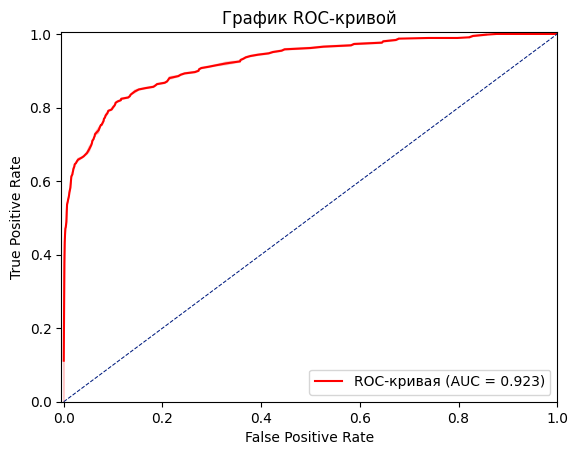

In [ ]:
# ROC-кривая (на тестовой выборке)
predict_proba = randomized_search_lgb.predict_proba(X_test)
fpr, tpr, treshold = roc_curve(y_test, predict_proba[:, 1])

sns.lineplot(
    x=fpr,
    y=tpr,
    color='r',
    lw=1.5,
    label='ROC-кривая (AUC = %0.3f)' % auc(fpr, tpr)
)
plt.plot([0, 1], [0, 1], linestyle='--', lw=0.75, label='Random')
plt.title('График ROC-кривой')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([-0.005, 1.0])
plt.ylim([0, 1.005])

pass

ROC-кривая показывает очень хорошие результаты на тестовой выборке.

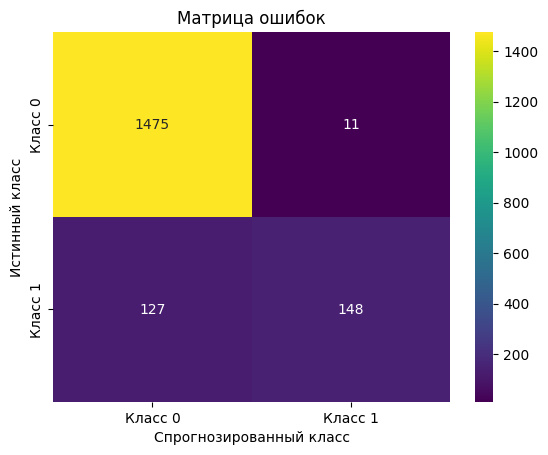

In [ ]:
# матрица ошибок
tick_labels = [f'Класс {i}' for i in range(0,2)]

cm = confusion_matrix(y_test, preds_lgb)
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='viridis',
    xticklabels=tick_labels,
    yticklabels=tick_labels
)
plt.title('Матрица ошибок')
plt.ylabel('Истинный класс')
plt.xlabel('Спрогнозированный класс')

pass

Видим следующие результаты: <br>
TP - 1475 <br>
TN - 148 <br>
FP - 11 <br>
FN - 127 <br>

Модель в 99% случаев точно определяет класс 0 (клиент не уйдет). При этом класс 1 (клиент уйдет) правильно определен в 53% случаев, что выглядит слабо. В данном случае следует снова напомнить о дисбалансе классов и пороге классификации, о котором будет упомянуто в итоговых выводах. <br>


### Проверка модели на адекватность

In [ ]:
# Проверка модели на адекватность с помощью DummyClassifier:
X_train_for_dummy = pd.DataFrame(
    data_preprocessor.fit_transform(X_train)
)
X_test_for_dummy = pd.DataFrame(data_preprocessor.transform(X_test))

# создание и обучение модели DummyClassifier
dummy_model = DummyClassifier(random_state=RANDOM_STATE)
dummy_model.fit(X_train_for_dummy, y_train)

dummy_model_proba = dummy_model.predict_proba(X_test_for_dummy)
dummy_model_preds = dummy_model.predict(X_test_for_dummy)

dummy_acc = roc_auc_score(y_test, dummy_model_proba[:,1])
print('Dummy ROC-AUC =', round(dummy_acc, 4))

dummy_acc = accuracy_score(y_test, dummy_model_preds)
print('Dummy Accuracy =', round(dummy_acc, 4))
pass

Dummy ROC-AUC = 0.5
Dummy Accuracy = 0.8438


Метрики ROC-AUC и Accuracy нашей лучшей модели превосходит метрику baseline модели DummyClassifier, которая по умолчанию всегда предсказывает наиболее часто встречающийся класс.

### Анализ важности признаков

#### Анализ важности признаков, участвовавших в моделировании

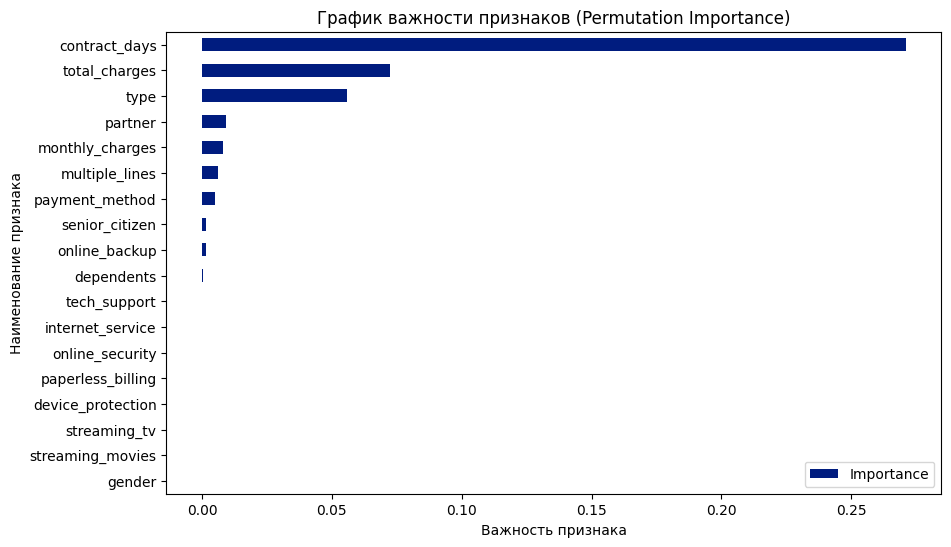

In [ ]:
# построение графика важности признаков
# масштабирование/кодирование для LGBMR не требуется
permutation = permutation_importance(
    model_lgb, X_test_lgb, y_test, scoring='roc_auc'
)

#X_test_preprocessed.columns[selector.get_support(indices=True)]
feature_importance = pd.DataFrame(
    {'Feature': X_test_lgb.columns, 'Importance':
        permutation['importances_mean']}
)
feature_importance = feature_importance.sort_values(
    'Importance', ascending=True
)
feature_importance.plot(
    x='Feature', y='Importance', kind='barh', figsize=(10, 6)
)

plt.title(f'График важности признаков (Permutation Importance)')
plt.xlabel('Важность признака')
plt.ylabel('Наименование признака')

pass

In [ ]:
# важность признаков в численном выражении
pd.DataFrame(
    model_lgb.feature_importances_,
    index=model_lgb.feature_name_,
    columns=['Важность']
).sort_values(by='Важность', ascending=False)

,Важность
contract_days,1370
total_charges,368
monthly_charges,321
type,80
payment_method,50
multiple_lines,41
partner,38
tech_support,38
streaming_movies,26
online_security,24


Созданный признак contract_days с большим отрывом лидирует в списке наиболее значимых, как на графике, так и в таблице с важностью признаков.<br>
А вот дальше между табличными значениеми и значениями графика есть расхождения.

<br>
При этом на графике  присутствуют категориальные признаки, которые вообще не влияют на предсказания модели, и их можно удалить.


#### Анализ важности признаков (включая мусорный признак)

С целью проверки модели на адекватность существующих (реальных) признаков создадим и добавим в датафрейм мусорный (garbage) признак и обучим модель.

In [ ]:
# создание мусорного признака
X_garbage = X.copy()
X_garbage['garbage'] = np.random.normal(
    loc=np.random.randint(low=0, high=10),
    scale=np.random.randint(low=1, high=10),
    size=(X_garbage.shape[0], 1)
)
display(X_garbage.head(3))

,type,paperless_billing,payment_method,monthly_charges,total_charges,contract_days,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,garbage
customer_id,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,Not defined,0.155272
5575-GNVDE,One year,No,Mailed check,56.95,2071.84,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,-8.874531
3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,123,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,-4.191675


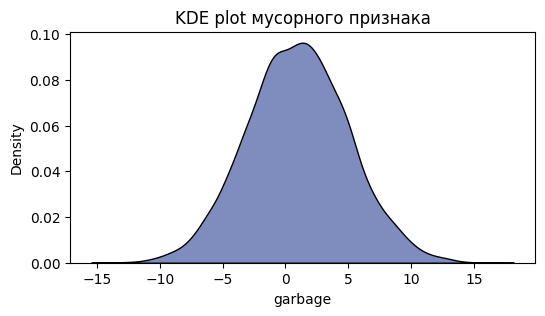

In [ ]:
# посмотрим на распределение мусорного признака
fig = plt.figure(figsize=(6,3))
sns.kdeplot(X_garbage['garbage'], multiple='stack', alpha=.5)
plt.title('KDE plot мусорного признака')

pass

In [ ]:
# делим датасет на тренировочную и тестовую выборки (с мусорным признаком)
y = y.copy()

X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(
    X_garbage,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

In [ ]:
# изменение типа данных категориальных признаков для корректной работы LightGBM
X_train_lgb_g = X_train_g.copy()
X_train_lgb_g[ohe_cols] = X_train_lgb_g[ohe_cols].astype('category')

X_test_lgb_g = X_test_g.copy()
X_test_lgb_g[ohe_cols] = X_test_lgb_g[ohe_cols].astype('category')

In [ ]:
%%time
# обучение лучшей модели на данных с мусорным признаком
model_lgb_g = lgb.LGBMClassifier(
    max_depth=2, n_estimators=835, verbose=0, random_state=RANDOM_STATE
)
model_lgb_g.fit(X_train_lgb_g, y_train_g)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMClassifier(max_depth=2, n_estimators=835, random_state=270125, verbose=0)

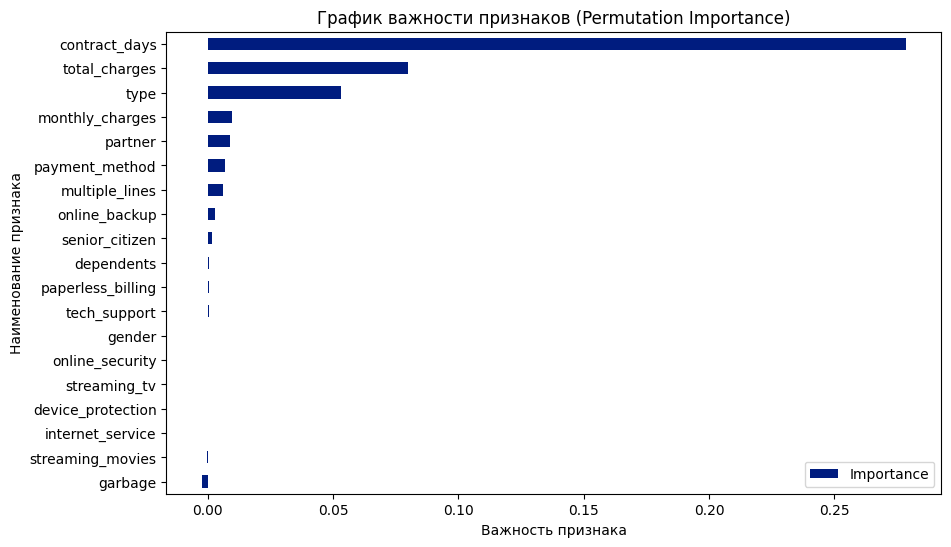

In [ ]:
# построение графика важности признаков
# масштабирование/кодирование для LGBMR не требуется
permutation = permutation_importance(
    model_lgb_g, X_test_lgb_g, y_test_g, scoring='roc_auc'
)

#X_test_preprocessed.columns[selector.get_support(indices=True)]
feature_importance = pd.DataFrame(
    {'Feature': X_test_lgb_g.columns, 'Importance':
        permutation['importances_mean']}
)
feature_importance = feature_importance.sort_values(
    'Importance', ascending=True
)
feature_importance.plot(
    x='Feature', y='Importance', kind='barh', figsize=(10, 6)
)

plt.title(f'График важности признаков (Permutation Importance)')
plt.xlabel('Важность признака')
plt.ylabel('Наименование признака')

pass

Согласно графика важности признаков мусорный признак не входит в топ важных признаков. Т.о., можно констатировать адекватность реальных признаков, т.к. garbage-признак не имеет решающего (или близкого к нему) значения в модели.


### Выводы

Хуже всего себя показала модель логистической регрессии, лучше всего - LGBM классификатор.<br>
Проведена оценка лучшей модели на тестовой выборке. Метрики показали значения, превышающие требуемые согласно заданию.<br>
Также выполнена проверка модели на адекватность с помощью baseline модели Dummy Classifier.<br>
В завершение входные признаки проанализированы на предмет важности каждого. Выполнен дополнительный анализ на данных, включающих мусорный признак.

## Общий вывод и рекомендации заказчику

### Общий вывод

В настоящем проекте были выполнены действия по созданию модели,  которая будет предсказывать, разорвёт ли абонент договор. Для этого были выполнены следующие шаги:
1. Выявлен целевой признак.<br><br>
2. Проведена предобработка данных:
- скорректированы наименования признаков;
- изменены типы некоторых данных;
- обработаны пропущенные значения.<br><br>
3. Выполнен исследовательский анализ данных:
- с помощью графиков исследованы распределения количественных и качественных признаков;
- удалены некоторые признаки, добавлен новый contract_days, который учитывает продолжительность действия договора клиента;
- выявлен дисбаланс значений целевого признака.<br><br>
4. Данные из четырех Dataframe объединены в один для дальнешего исследования.
5. Проведена предобработка данных объединенного dataframe:
- появившиеся пропуски устранен;
- выявлены дубликаты, однако, все значения customer_id - уникальны, поэтому - полные дубликаты отсутствуют.<br><br>
6.  Проведен исследовательский и корреляционный анализ объединенного датафрейма.<br>
Четкого разделения на классы целевой переменной не прослеживается.
Взаимосвязь целевого признака с входными выражена не сильно (использована шкала Чеддока).<br>
Проведена проверка и дополнительная проверка с помощью VIF на наличие мультколлинеарности между признаками.<br>
Распределения количественных признаков (в разрезе целевого признака) несимметричны (использованы графики KDE). В целом распределения значений для разных классов целевого признака похожи.<br>
Определено, какие клиенты чаще расторгают договор:<br>
тип оплаты (type): раз в года-два;
тип платежа (payment_method): bank transfer (automatic) и credit card (automatic)';
пенсионеры;
абоненты, у которых есть супруг/супруга;
тип подключения: абоненты с оптоволокном (fiber optic);
с подключенными дополнительными услугами.<br><br>
7. Рассмотрена проблема дисбаланса классов целевого признака.<br>
С целью минимизации последствий несбалансированного распределения целевого признака на этапе разработки данного проекта была произведена попытка устранения дисбаланса с помощью сэмплирования. Было искусственно увеличено количество значений минорного класса методом oversampling/upsampling (только для тренировочной выборки). Однако, upsampling в дальнейшем привел к переобучению модели, и было принято решение от него отказаться.<br>
Данные подготовлены для дальнейшего моделирования (использованы пайплайны).<br>
С помощью алгоритма уменьшения размерности UMAP произведена визуальная оценка разделения классов целевого признака: увеличилась уверенность в том, что можно успешно провести классификацию целевого признака.<br><br>
8. Обучены 6 моделей классификации, для каждой был произведен перебор гиперпараметров, а также выполнена оценка качества работы этих моделей.<br><br>
9. Выбрана лучшая модель - **LGBM классификатор**.
Проведена ее оценка на тестовой выборке. Метрики показали значения, превышающие требуемые согласно заданию.<br>
Также выполнена проверка модели на адекватность с помощью baseline модели Dummy Classifier.<br>
В завершение входные признаки проанализированы на предмет важности каждого. Выполнен дополнительный анализ на данных, включающих мусорный признак.<br><br>

### Рекомендации заказчику

Метрики, используемые в данном проекте - обобщенные. Для более оптимальной настройки модели следует определить бизнес-метрики и по результатам 'откалибровать' модель с помощью порогов классификации: возможно, потребуется удержать клиентов, которые склонны уйти (Recall) или, наоборот, сдвинуть порог в сторону Precision.<br>
Следует помнить о дисбалансе классов: у мажорного класса 'клиент не уйдет' приемущество: модель лучше предсказывает его значения. Компании «ТелеДом» важно не упускать класс '1', а его доля очень низка относительно класса '0'.<br><br>
Если планируется существенное увеличение объема входящих данных, следует оптимизировать их сбор и хранение:
- пересобрать таблицы с учетом того, что некоторые признаки не будут использованы в модели. Такие признаки можно хранить отдельно;
- по возможности не допускать пропусков в данных;
- изменить типы данных некоторых признаков на менее требовательные к памяти.




 <br>